# Conversion Rate Analysis for an E-commerce website 
### Rupali Wadhawan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('/Users/rupaliwadhawan/Downloads/conversion_data.csv')

In [3]:
df

Unnamed: 0  visitor_id visitor_location marketing_channel gender   
0              0           1    North America           youtube      M  \
1              1           2    South America           organic      F   
2              2           3        Australia         instagram      M   
3              3           4    North America          facebook      M   
4              4           5             Asia         instagram      F   
...          ...         ...              ...               ...    ...   
1995        1995        1996           Europe           organic      F   
1996        1996        1997    South America            google      M   
1997        1997        1998             Asia          facebook      M   
1998        1998        1999    South America           youtube      F   
1999        1999        2000    North America         instagram      F   

      product_views_Mon  product_views_Tue  product_views_Wed   
0                     4                  5                  2  \
1                     2                  5                  0   
2                     3                  4                  0   
3                     1                  0                  0   
4                     1                  5                  2   
...                 ...                ...                ...   
1995                  3                  0                  0   
1996                  1                  2                  0   
1997                  2                  3                  0   
1998                  2                  2                  2   
1999                  2                  1                  1   

      product_views_Thu  product_views_Fri  ...  time_on_site_Tue   
0                     1                  2  ...                33  \
1                     1                  5  ...                28   
2                    -3                  5  ...                34   
3                     5                  0  ...                26   
4                     2                  3  ...                54   
...                 ...                ...  ...               ...   
1995                  4                  2  ...                22   
1996                  4                  1  ...                54   
1997                  0                  8  ...                32   
1998                  5                  5  ...                21   
1999                  5                  1  ...                21   

      time_on_site_Wed  time_on_site_Thu  time_on_site_Fri  pages_visited_Mon   
0                   23                46                57                  4  \
1                   39                24                51                  5   
2                   22                34                31                  1   
3                   43                22                39                  3   
4                   30                47                57                  6   
...                ...               ...               ...                ...   
1995                51                44                29                  5   
1996                33                59                38                  1   
1997                30                48                38                  2   
1998                51                41                56                  6   
1999                45                59                21                  4   

      pages_visited_Tue  pages_visited_Wed  pages_visited_Thu   
0                     5                  5                  4  \
1                     6                  7                  6   
2                     3                  3                  2   
3                     4                  7                  7   
4                     6                  5                  2   
...                 ...                ...                ...   
1995                  1                  5                  7   
1996          

## Part 1: Data Cleaning and Exploration

In [4]:
df.drop(columns='Unnamed: 0',axis=0,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [6]:
df.describe(include='all')

visitor_id visitor_location marketing_channel gender   
count   2000.000000             2000              2000   2000  \
unique          NaN                5                 5      2   
top             NaN    South America         instagram      F   
freq            NaN              433               431   1093   
mean    1000.500000              NaN               NaN    NaN   
std      577.494589              NaN               NaN    NaN   
min        1.000000              NaN               NaN    NaN   
25%      500.750000              NaN               NaN    NaN   
50%     1000.500000              NaN               NaN    NaN   
75%     1500.250000              NaN               NaN    NaN   
max     2000.000000              NaN               NaN    NaN   

        product_views_Mon  product_views_Tue  product_views_Wed   
count         2000.000000        2000.000000        2000.000000  \
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean             2.541500           2.440500           2.441000   
std              1.704914           1.715206           2.343345   
min              0.000000           0.000000           0.000000   
25%              1.000000           1.000000           0.000000   
50%              3.000000           2.000000           2.000000   
75%              4.000000           4.000000           4.000000   
max              5.000000           5.000000           9.000000   

        product_views_Thu  product_views_Fri  avg_rating_Mon  ...   
count         2000.000000        2000.000000     2000.000000  ...  \
unique                NaN                NaN             NaN  ...   
top                   NaN                NaN             NaN  ...   
freq                  NaN                NaN             NaN  ...   
mean             2.256500           2.354000        3.023990  ...   
std              2.370974           2.335682        1.151037  ...   
min             -4.000000          -3.000000        1.000000  ...   
25%              0.000000           0.000000        2.017500  ...   
50%              2.000000           2.000000        3.055000  ...   
75%              5.000000           5.000000        4.022500  ...   
max              8.000000           8.000000        5.000000  ...   

        time_on_site_Tue  time_on_site_Wed  time_on_site_Thu   
count        2000.000000       2000.000000       2000.000000  \
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean           39.776500         40.155500         40.417000   
std            11.855624         11.757399         11.892638   
min            20.000000         20.000000         20.000000   
25%            29.000000         30.000000         30.000000   
50%            40.000000         40.000000         40.500000   
75%            50.000000         50.000000         51.000000   
max            60.000000         60.000000         60.000000   

        time_on_site_Fri  pages_visited_Mon  pages_visited_Tue   
count        2000.000000        2000.000000        2000.000000  \
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean           40.028500           3.946000           4.071000   
std            11.664207           2.010001           2.012209   
min            20.000000           1.000000           1.000000   
25%            30.000000           2.000000           2.000000   
50%            40.000000           4.000000           4.000000   
75%            50.000000           6.000000           6.000000   
max            60.000000           7.000000           7.000000   

        pages_visited_Wed  pages

### Creating features to reduce dimensions

In [7]:
df['total_avg_product_view'] = (df['product_views_Mon']+df['product_views_Tue']+df['product_views_Wed']+df['product_views_Thu']+df['product_views_Fri'])/5

In [8]:
df['total_avg_rating'] = (df['avg_rating_Mon']+df['avg_rating_Tue']+df['avg_rating_Wed']+df['avg_rating_Thu']+df['avg_rating_Fri'])/5

In [9]:
df['total_avg_price'] = (df['avg_price_Mon']+df['avg_price_Tue']+df['avg_price_Wed']+df['avg_price_Thu']+df['avg_price_Fri'])/5

In [10]:
df['total_avg_time_on_site'] = (df['time_on_site_Mon']+df['time_on_site_Tue']+df['time_on_site_Wed']+df['time_on_site_Thu']+df['time_on_site_Fri'])/5

In [11]:
df['total_avg_pages_visited'] = (df['pages_visited_Mon']+df['pages_visited_Tue']+df['pages_visited_Wed']+df['pages_visited_Thu']+df['pages_visited_Fri'])/5

### Exploratory Data Analysis

#### Objective: To find patterns, correlations and trends between the different features of the dataset. 


<Axes: >

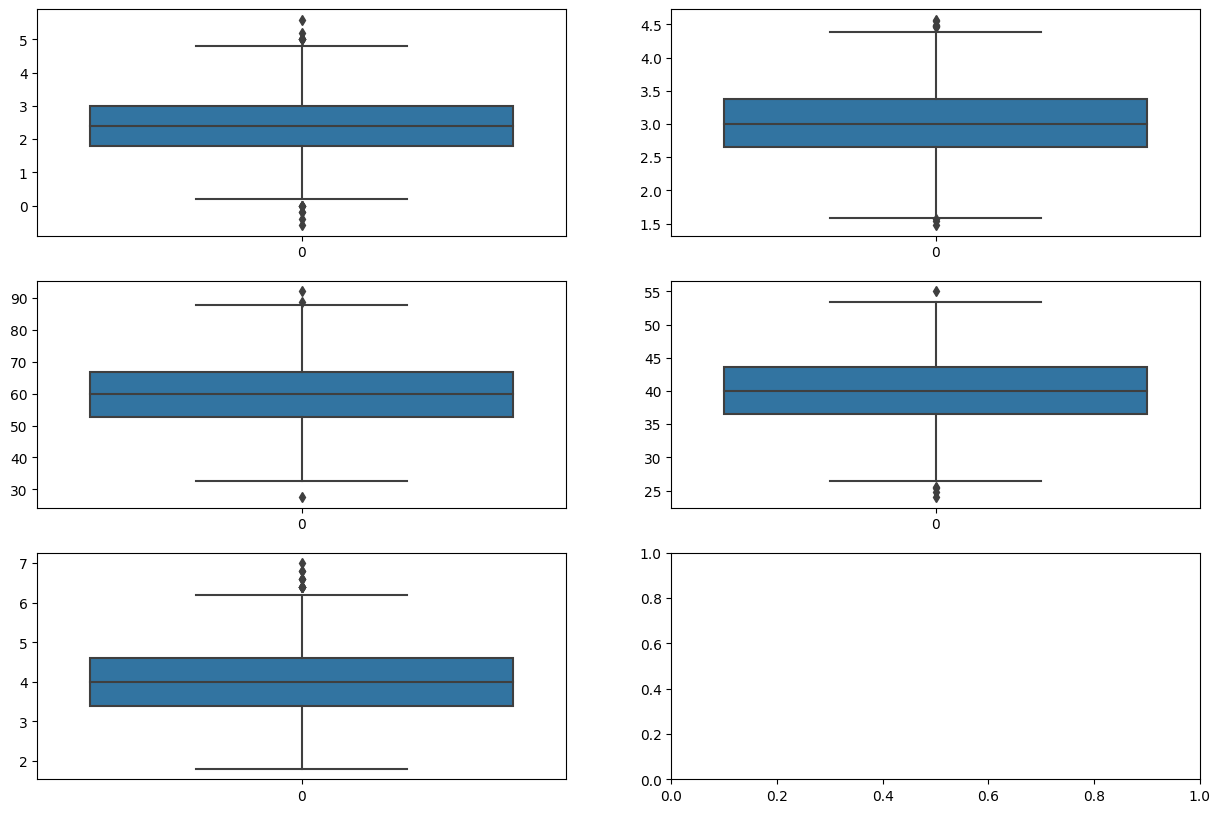

In [12]:
fig, axs = plt.subplots(3,2, figsize=(15,10))
sns.boxplot(df['total_avg_product_view'], ax=axs[0][0])
sns.boxplot(df['total_avg_rating'], ax=axs[0][1])
sns.boxplot(df['total_avg_price'], ax=axs[1][0])
sns.boxplot(df['total_avg_time_on_site'], ax=axs[1][1])
sns.boxplot(df['total_avg_pages_visited'], ax=axs[2][0])

### Outlier Removal:
#### Used the Z-score method to remove outliers for better accuracy

In [13]:
numerical_cols = ['total_avg_product_view',
       'total_avg_rating', 'total_avg_price', 'total_avg_time_on_site',
       'total_avg_pages_visited']
categorical_cols = ['visitor_location', 'marketing_channel', 'gender','converted_Fri']

In [14]:
for column in numerical_cols:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

total_avg_product_view: skewness = 0.08152384170156853, kurtosis = -0.31706565166685685
total_avg_rating: skewness = -0.01955180276451296, kurtosis = -0.21508188709720866
total_avg_price: skewness = 0.11196913330273442, kurtosis = -0.2722925608746758
total_avg_time_on_site: skewness = -0.024097830179721905, kurtosis = -0.261084325522595
total_avg_pages_visited: skewness = 0.07247798018489873, kurtosis = -0.2735367060678282


In [15]:
#creating a copy of df to test outlier removal
df2 = df.copy()

In [16]:
if abs(s) > 1:
    df2[column] = df2[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df2[numerical_cols])
threshold = 3
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitor_id               2000 non-null   int64  
 1   visitor_location         2000 non-null   object 
 2   marketing_channel        2000 non-null   object 
 3   gender                   2000 non-null   object 
 4   product_views_Mon        2000 non-null   int64  
 5   product_views_Tue        2000 non-null   int64  
 6   product_views_Wed        2000 non-null   int64  
 7   product_views_Thu        2000 non-null   int64  
 8   product_views_Fri        2000 non-null   int64  
 9   avg_rating_Mon           2000 non-null   float64
 10  avg_rating_Tue           2000 non-null   float64
 11  avg_rating_Wed           2000 non-null   float64
 12  avg_rating_Thu           2000 non-null   float64
 13  avg_rating_Fri           2000 non-null   float64
 14  avg_price_Mon           

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitor_id               1992 non-null   int64  
 1   visitor_location         1992 non-null   object 
 2   marketing_channel        1992 non-null   object 
 3   gender                   1992 non-null   object 
 4   product_views_Mon        1992 non-null   int64  
 5   product_views_Tue        1992 non-null   int64  
 6   product_views_Wed        1992 non-null   int64  
 7   product_views_Thu        1992 non-null   int64  
 8   product_views_Fri        1992 non-null   int64  
 9   avg_rating_Mon           1992 non-null   float64
 10  avg_rating_Tue           1992 non-null   float64
 11  avg_rating_Wed           1992 non-null   float64
 12  avg_rating_Thu           1992 non-null   float64
 13  avg_rating_Fri           1992 non-null   float64
 14  avg_price_Mon            1992

In [19]:
# Since only 8 values are being dropped, lets apply this to our main df
if abs(s) > 1:
    df[column] = df[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df[numerical_cols])
threshold = 3
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

<Axes: >

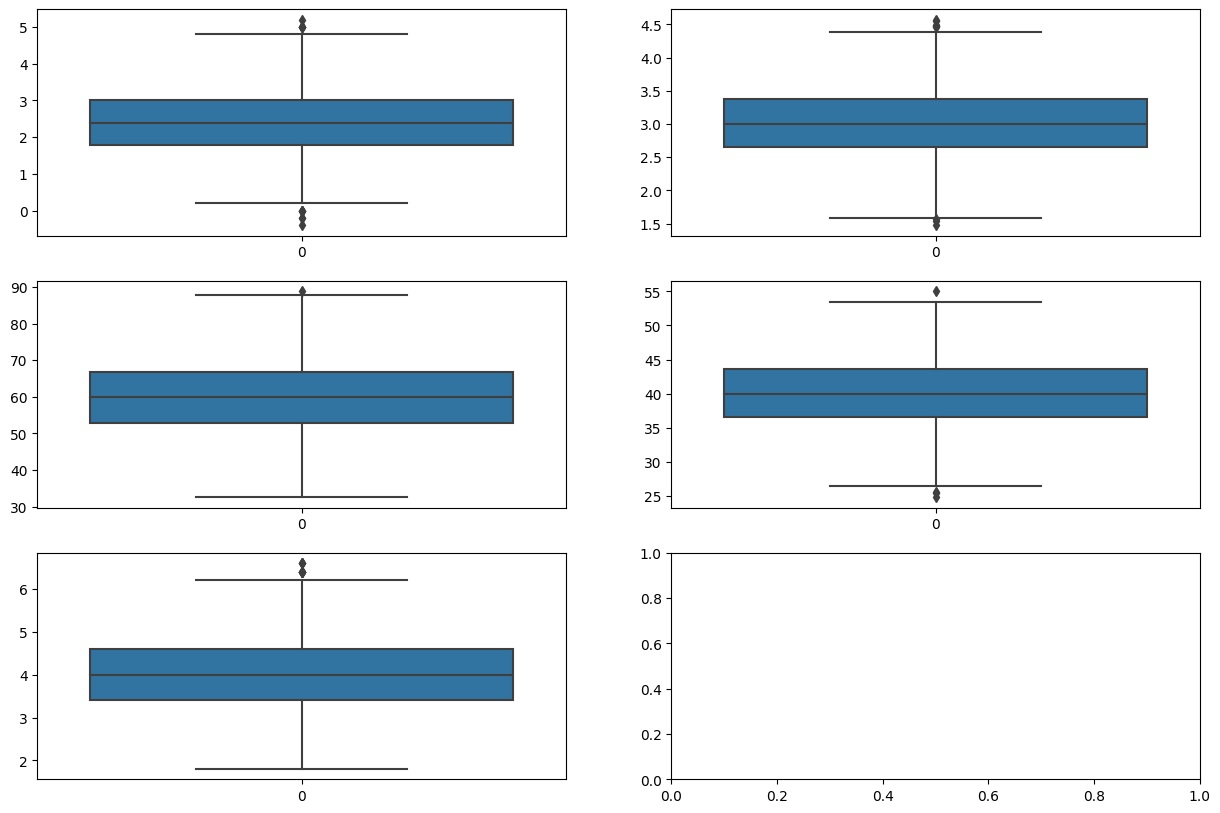

In [20]:
fig, axs = plt.subplots(3,2, figsize=(15,10))
sns.boxplot(df['total_avg_product_view'], ax=axs[0][0])
sns.boxplot(df['total_avg_rating'], ax=axs[0][1])
sns.boxplot(df['total_avg_price'], ax=axs[1][0])
sns.boxplot(df['total_avg_time_on_site'], ax=axs[1][1])
sns.boxplot(df['total_avg_pages_visited'], ax=axs[2][0])

## Part 2: Statistical analysis:
#### To review how the metrics change based on demographic. 

In [21]:
df.head()

visitor_id visitor_location marketing_channel gender  product_views_Mon   
0           1    North America           youtube      M                  4  \
1           2    South America           organic      F                  2   
2           3        Australia         instagram      M                  3   
3           4    North America          facebook      M                  1   
4           5             Asia         instagram      F                  1   

   product_views_Tue  product_views_Wed  product_views_Thu  product_views_Fri   
0                  5                  2                  1                  2  \
1                  5                  0                  1                  5   
2                  4                  0                 -3                  5   
3                  0                  0                  5                  0   
4                  5                  2                  2                  3   

   avg_rating_Mon  ...  pages_visited_Tue  pages_visited_Wed   
0            3.90  ...                  5                  5  \
1            1.31  ...                  6                  7   
2            3.26  ...                  3                  3   
3            2.66  ...                  4                  7   
4            2.76  ...                  6                  5   

   pages_visited_Thu  pages_visited_Fri  converted_Fri   
0                  4                  6              1  \
1                  6                  2              0   
2                  2                  3              1   
3                  7                  1              0   
4                  2                  4              1   

   total_avg_product_view  total_avg_rating  total_avg_price   
0                     2.8             3.134           54.738  \
1                     2.6             2.068           71.432   
2                     1.8             3.666           64.358   
3                     1.2             3.300           56.048   
4                     2.6             2.364           46.442   

   total_avg_time_on_site  total_avg_pages_visited  
0                    43.2                      4.8  
1                    33.2                      5.2  
2                    28.8                      2.4  
3                    37.2                      4.4  
4                    44.6                      4.6  

[5 rows x 35 columns]

In [22]:
df.groupby('visitor_location')[['total_avg_product_view','total_avg_rating','total_avg_price','total_avg_time_on_site','total_avg_pages_visited']].mean()

total_avg_product_view  total_avg_rating  total_avg_price   
visitor_location                                                              
Asia                            2.386957          3.023962        60.254082  \
Australia                       2.363682          2.995239        60.210602   
Europe                          2.469291          3.000541        60.260210   
North America                   2.332029          3.008181        59.672538   
South America                   2.478241          3.022495        59.967653   

                  total_avg_time_on_site  total_avg_pages_visited  
visitor_location                                                   
Asia                           39.809239                 3.967935  
Australia                      40.169652                 3.990547  
Europe                         39.692388                 3.955381  
North America                  40.120293                 4.119804  
South America                  40.341204                 4.050000

In [23]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_product_view']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_product_view']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_product_view']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_product_view']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_product_view']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=1.851272565345193, pvalue=0.11642747467463124)


In [24]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_rating']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_rating']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_rating']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_rating']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_rating']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=0.2388839347272661, pvalue=0.9164244139801958)


In [25]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_price']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_price']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_price']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_price']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_price']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=0.24885199067849398, pvalue=0.910453449941384)


In [26]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_time_on_site']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_time_on_site']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_time_on_site']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_time_on_site']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_time_on_site']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=1.1031953891124753, pvalue=0.35334002693537164)


In [27]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_pages_visited']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_pages_visited']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_pages_visited']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_pages_visited']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_pages_visited']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=2.3196312779000454, pvalue=0.05488352297832463)


In [28]:
df.groupby('marketing_channel')[['total_avg_product_view','total_avg_rating','total_avg_price','total_avg_time_on_site','total_avg_pages_visited']].mean()

total_avg_product_view  total_avg_rating  total_avg_price   
marketing_channel                                                              
facebook                         2.410714          3.026286        59.735566  \
google                           2.391960          2.967523        60.219583   
instagram                        2.407477          3.035715        60.378173   
organic                          2.336946          3.023281        60.457542   
youtube                          2.493478          2.994723        59.451201   

                   total_avg_time_on_site  total_avg_pages_visited  
marketing_channel                                                   
facebook                        40.164796                 4.063265  
google                          40.140201                 4.070352  
instagram                       40.060748                 4.004673  
organic                         39.956158                 3.969458  
youtube                         39.860870                 3.988043

In [29]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_product_view']
m2 = df[df['marketing_channel'] == 'google']['total_avg_product_view']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_product_view']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_product_view']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_product_view']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=1.3024443721028962, pvalue=0.2668468685688844)


In [30]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_rating']
m2 = df[df['marketing_channel'] == 'google']['total_avg_rating']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_rating']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_rating']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_rating']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=1.152451509759677, pvalue=0.33007284366640444)


In [31]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_price']
m2 = df[df['marketing_channel'] == 'google']['total_avg_price']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_price']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_price']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_price']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=0.7119672196331803, pvalue=0.5837023663713832)


In [32]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_time_on_site']
m2 = df[df['marketing_channel'] == 'google']['total_avg_time_on_site']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_time_on_site']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_time_on_site']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_time_on_site']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=0.24051731426981451, pvalue=0.9154546133874496)


In [33]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_pages_visited']
m2 = df[df['marketing_channel'] == 'google']['total_avg_pages_visited']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_pages_visited']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_pages_visited']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_pages_visited']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=1.017767393712429, pvalue=0.3967548130344334)


In [34]:
df.groupby('gender')[['total_avg_product_view','total_avg_rating','total_avg_price','total_avg_time_on_site','total_avg_pages_visited']].mean()

total_avg_product_view  total_avg_rating  total_avg_price   
gender                                                              
F                     2.480147          3.008640        59.977963  \
M                     2.317920          3.011918        60.169662   

        total_avg_time_on_site  total_avg_pages_visited  
gender                                                   
F                    39.924449                 4.023162  
M                    40.176549                 4.014159

In [35]:
g1 = df[df['gender'] == 'F']['total_avg_product_view']
g2 = df[df['gender'] == 'M']['total_avg_product_view']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=14.071346849169478, pvalue=0.00018103910612953867)


In [36]:
g1 = df[df['gender'] == 'F']['total_avg_rating']
g2 = df[df['gender'] == 'M']['total_avg_rating']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.01936064042872285, pvalue=0.8893516095258578)


In [37]:
g1 = df[df['gender'] == 'F']['total_avg_price']
g2 = df[df['gender'] == 'M']['total_avg_price']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.17505300390094736, pvalue=0.6757046869735561)


In [38]:
g1 = df[df['gender'] == 'F']['total_avg_time_on_site']
g2 = df[df['gender'] == 'M']['total_avg_time_on_site']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=1.212237198510622, pvalue=0.2710226587126338)


In [39]:
g1 = df[df['gender'] == 'F']['total_avg_pages_visited']
g2 = df[df['gender'] == 'M']['total_avg_pages_visited']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.05002871629722797, pvalue=0.8230362714374941)


### Initial Insights: 
- There is a statistically significant difference in total_avg_pages_visited for locations (and somewhat in total_avg_product_view)
- There is no statistically significant difference in all 5 metrics based on marketing channel
- There is a very statistically significant difference in total_avg_product_view for different genders. 

In [40]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri',
       'total_avg_product_view', 'total_avg_rating', 'total_avg_price',
       'total_avg_time_on_site', 'total_avg_pages_visited'],
      dtype='object')

In [41]:
all_numerical_cols = ['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri',
       'total_avg_product_view', 'total_avg_rating', 'total_avg_price',
       'total_avg_time_on_site', 'total_avg_pages_visited']

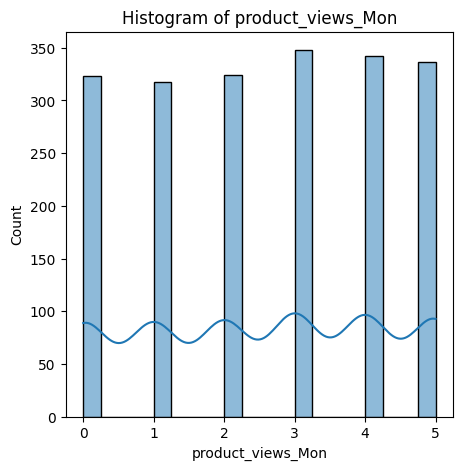

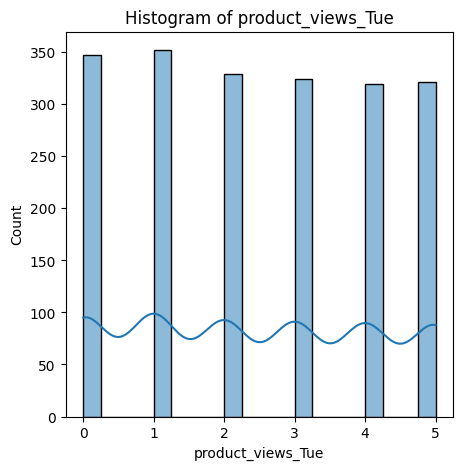

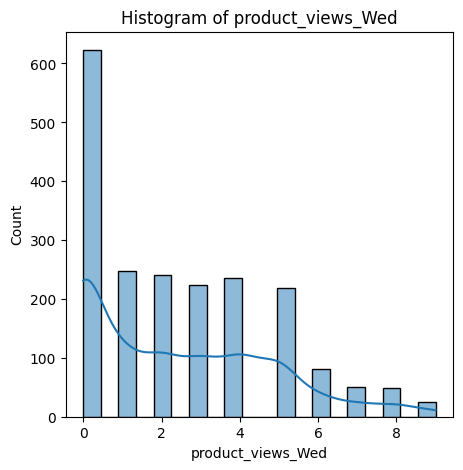

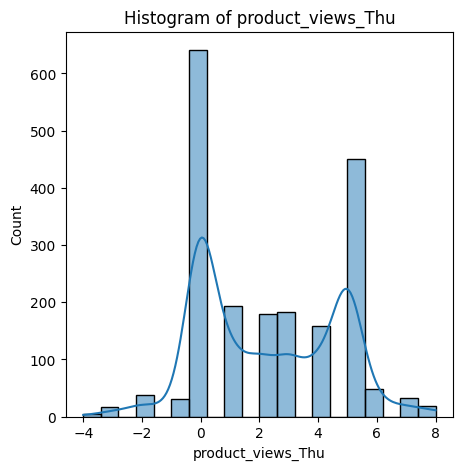

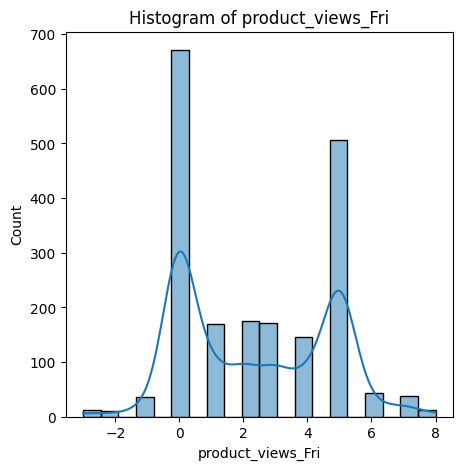

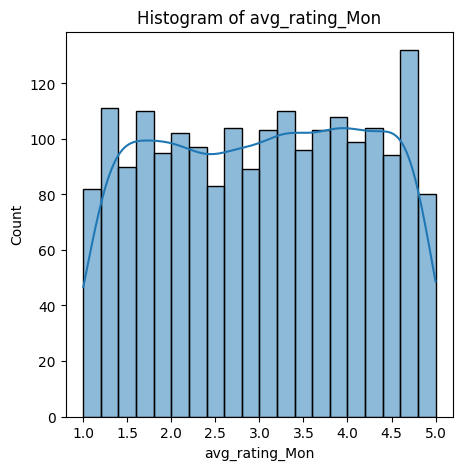

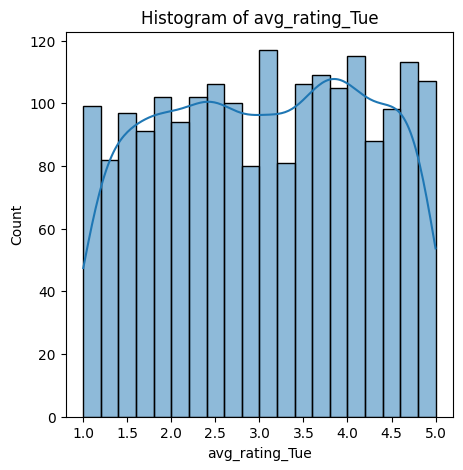

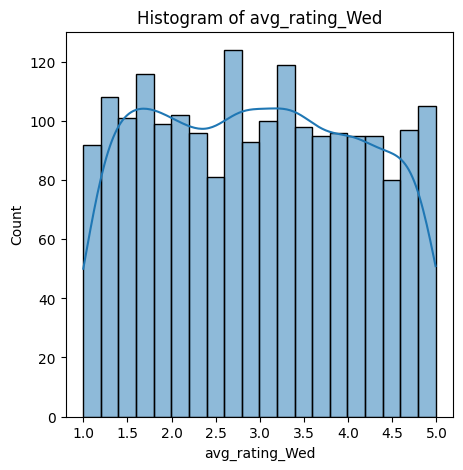

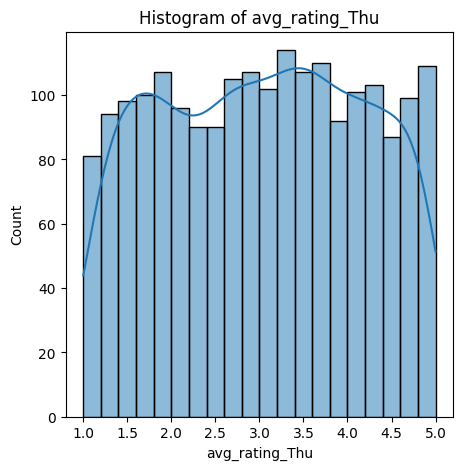

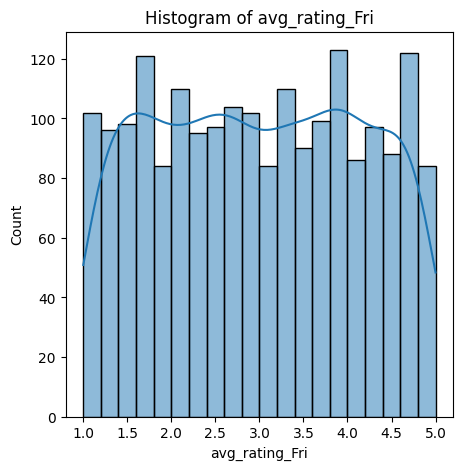

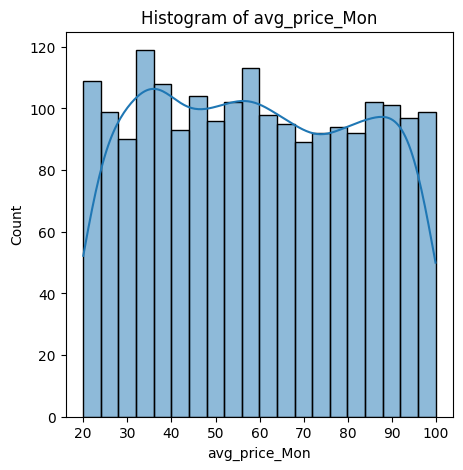

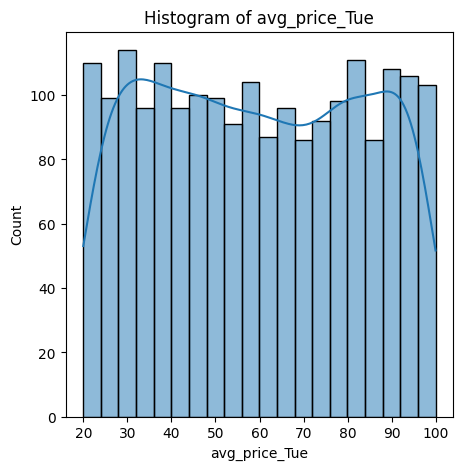

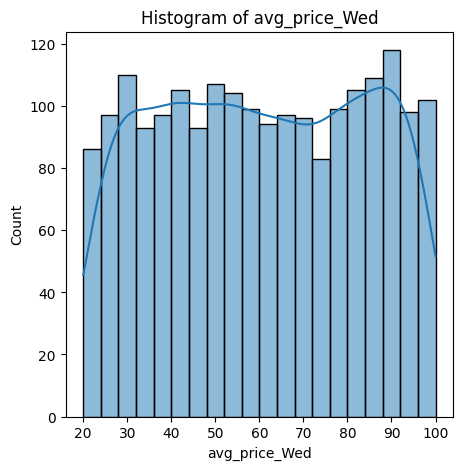

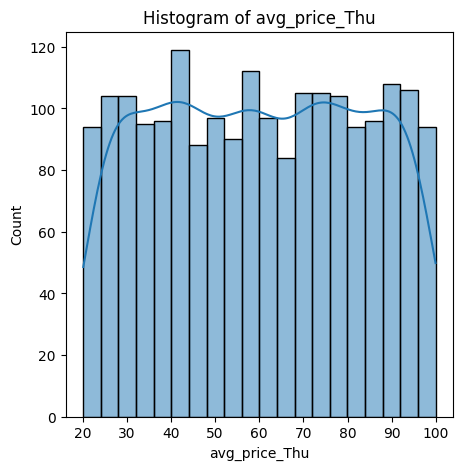

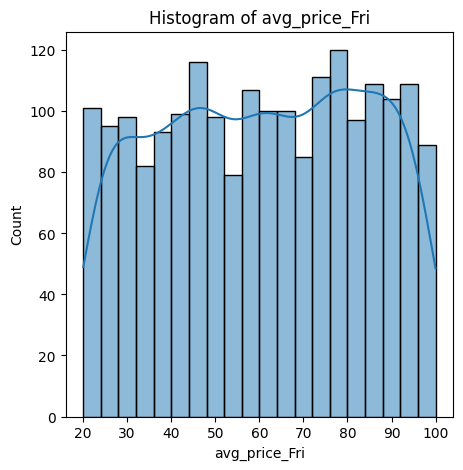

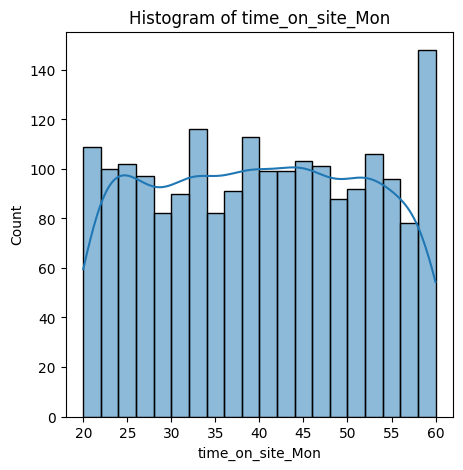

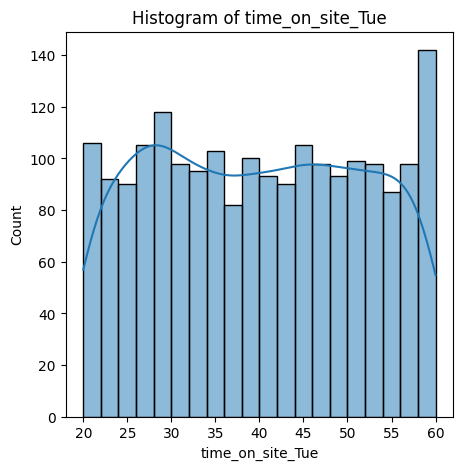

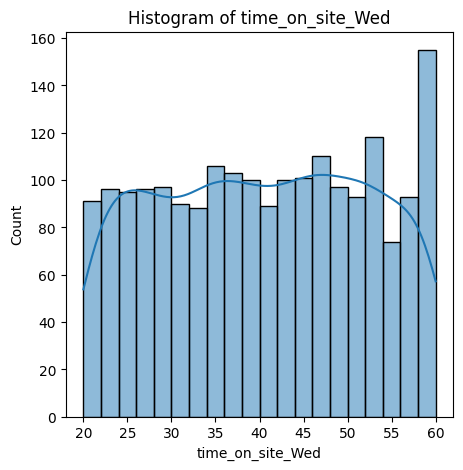

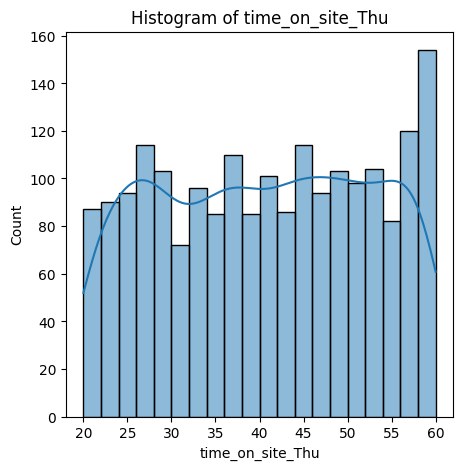

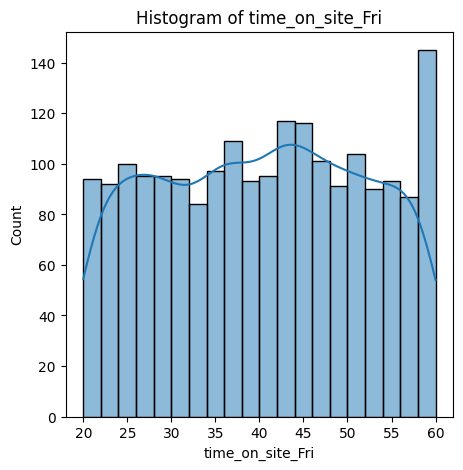

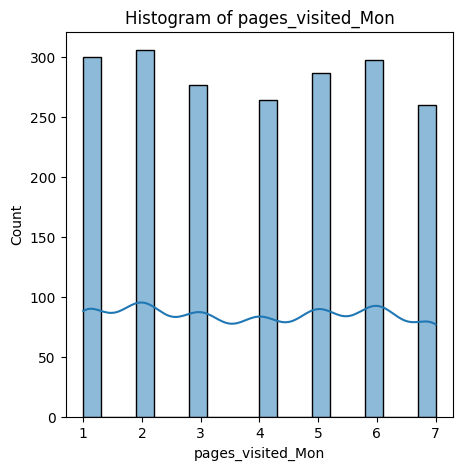

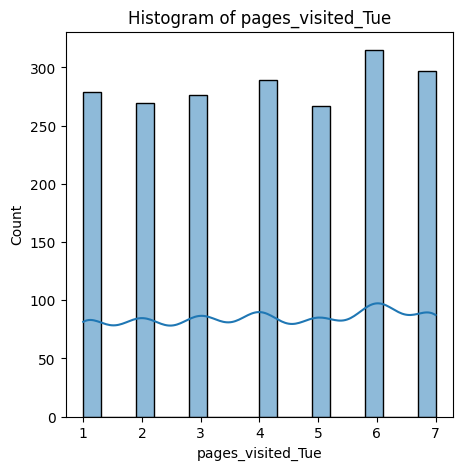

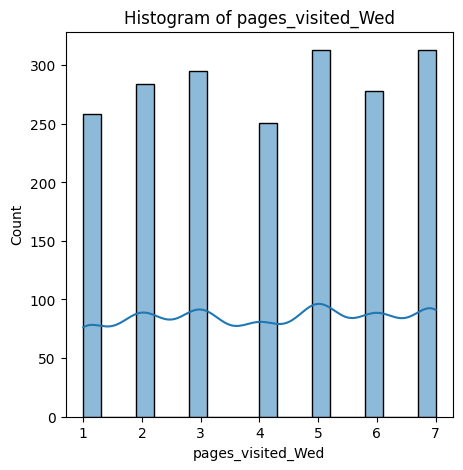

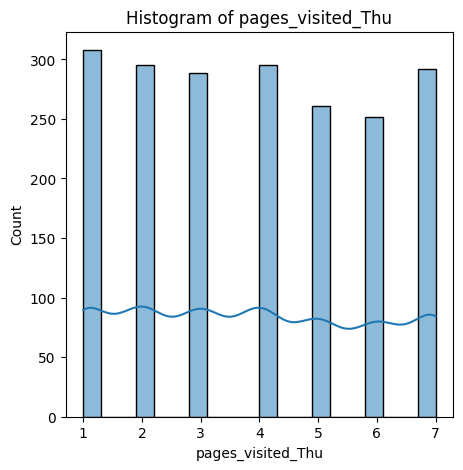

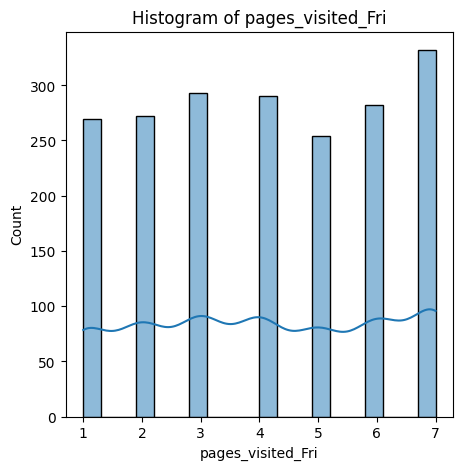

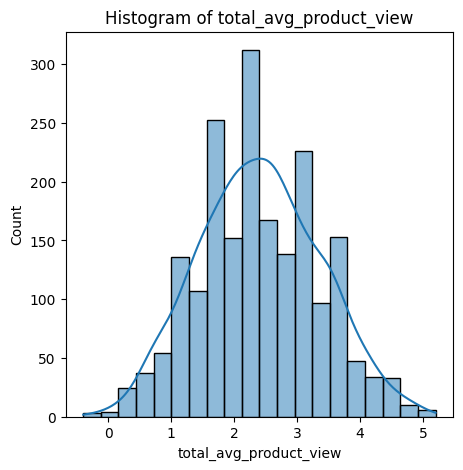

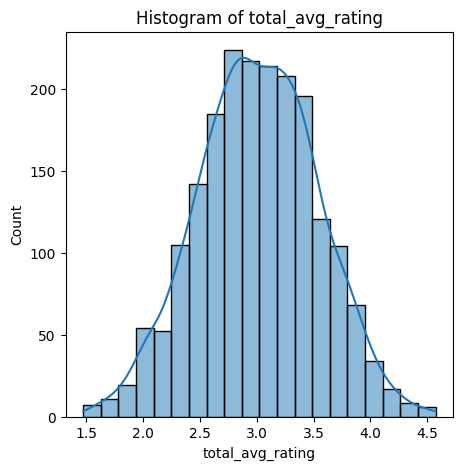

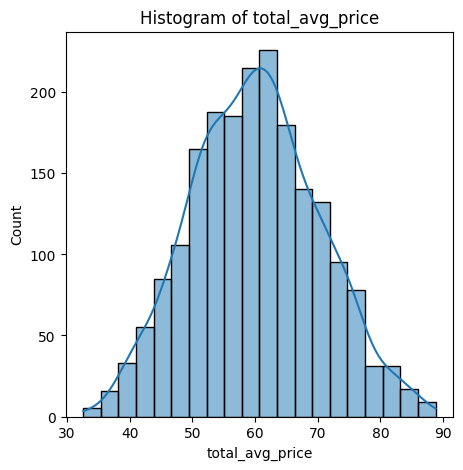

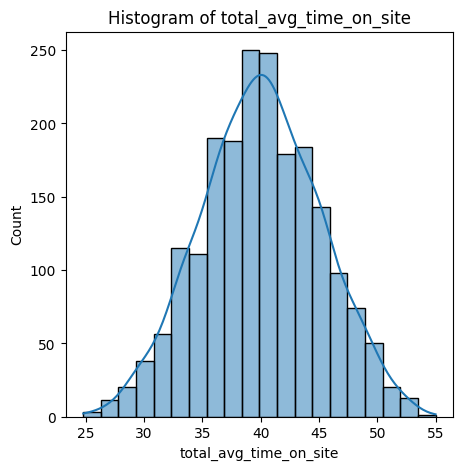

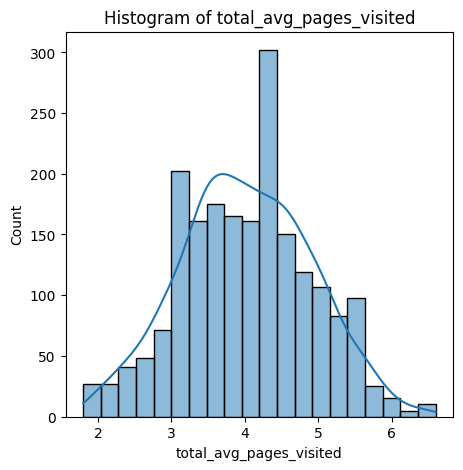

In [42]:
for column in all_numerical_cols:
    plt.figure(figsize=(5, 5)) # Optional: Set the figure size
    sns.histplot(df[column], bins=20, kde=True) # You can customize the number of bins, KDE line, etc.
    plt.title(f'Histogram of {column}') # Add a title for each plot
    plt.show()


### Results:
From this we can see that except for Product views, the other metrics are not that variable on different days of the week so we can comfortably take their mean and use that feature instead. 

For Product view, There is a variability on Wednesday, Thursday and Friday so it makes sense to explore that more. 

In [43]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri',
       'total_avg_product_view', 'total_avg_rating', 'total_avg_price',
       'total_avg_time_on_site', 'total_avg_pages_visited'],
      dtype='object')

In [44]:
relevant_cols = ['visitor_location', 'marketing_channel', 'gender','product_views_Wed','product_views_Thu','product_views_Fri','total_avg_product_view',
       'total_avg_rating', 'total_avg_price', 'total_avg_time_on_site',
       'total_avg_pages_visited','converted_Fri']

In [45]:
new_df = df[relevant_cols]

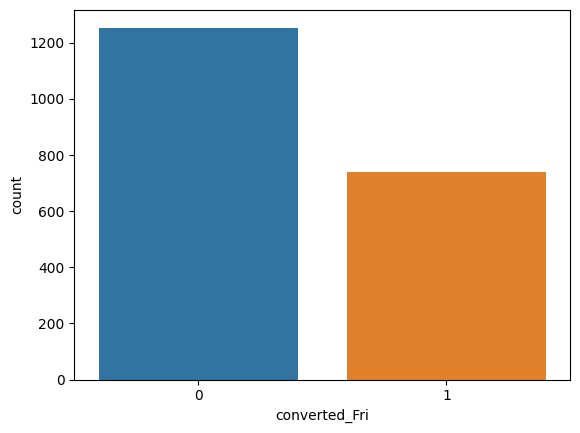

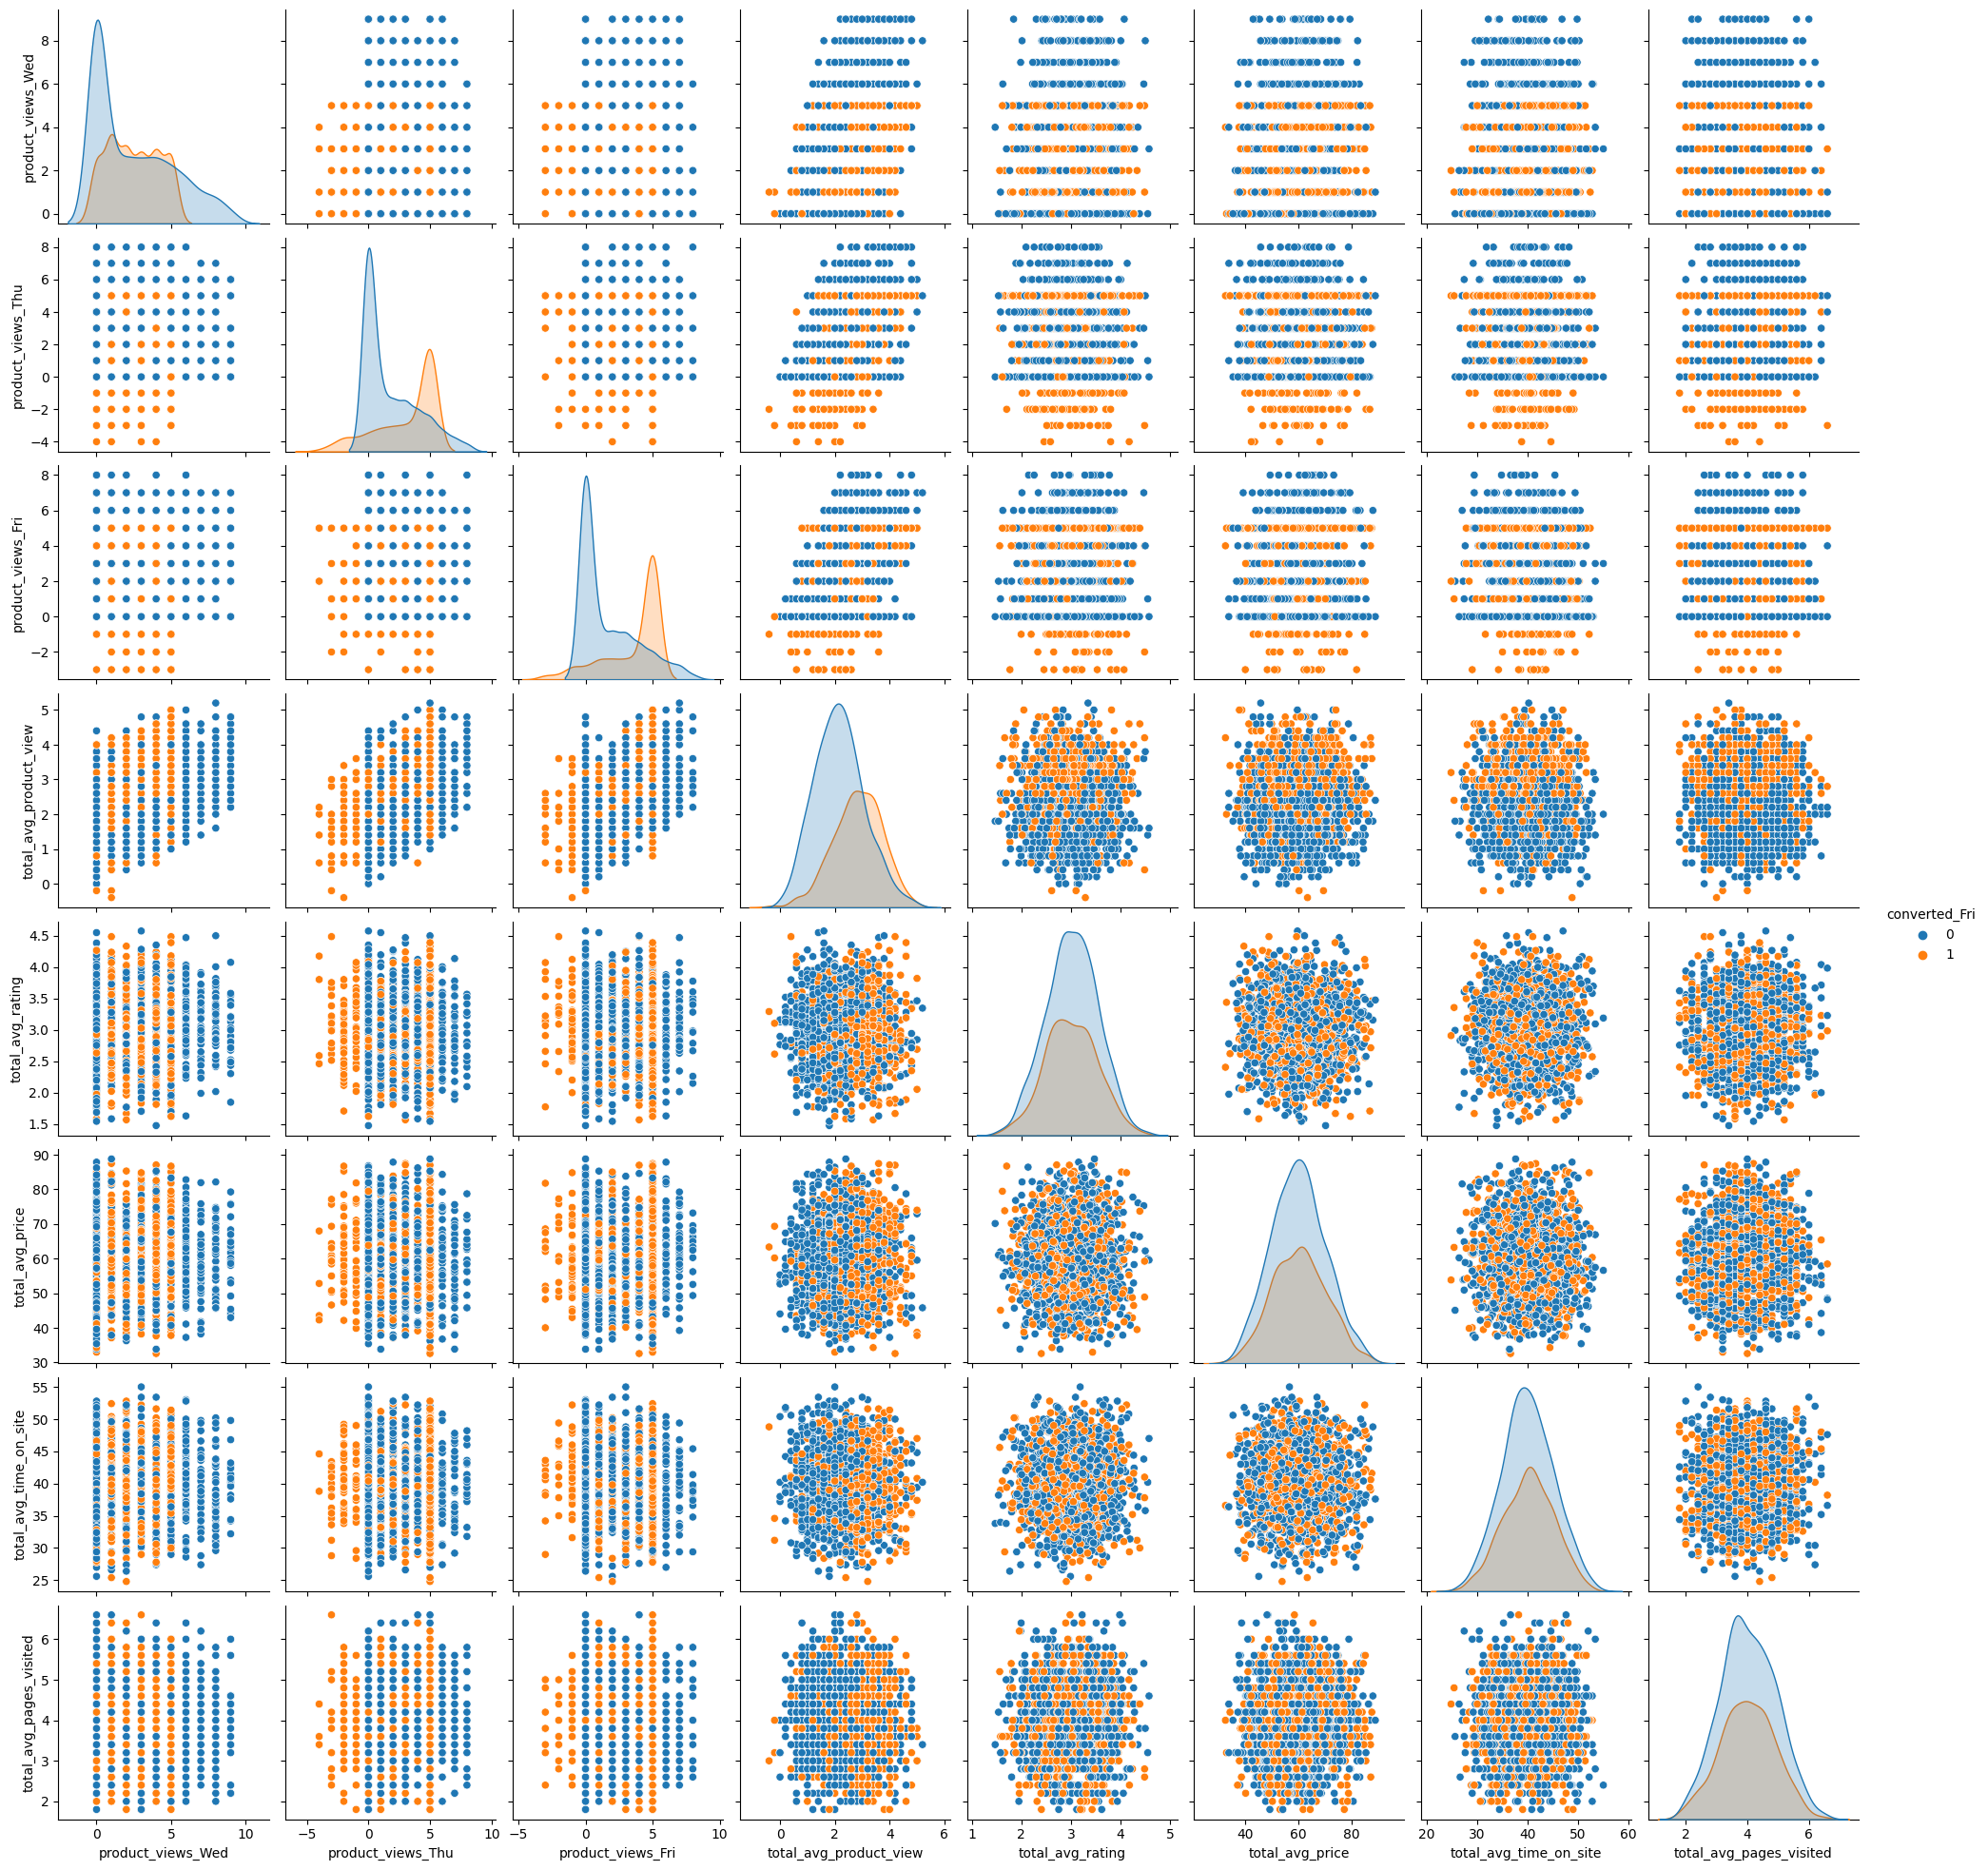

In [46]:
sns.countplot(x='converted_Fri', data=new_df)
plt.show()

# More detailed exploration
sns.pairplot(new_df, hue='converted_Fri')
plt.show()

<Axes: xlabel='product_views_Fri', ylabel='Count'>

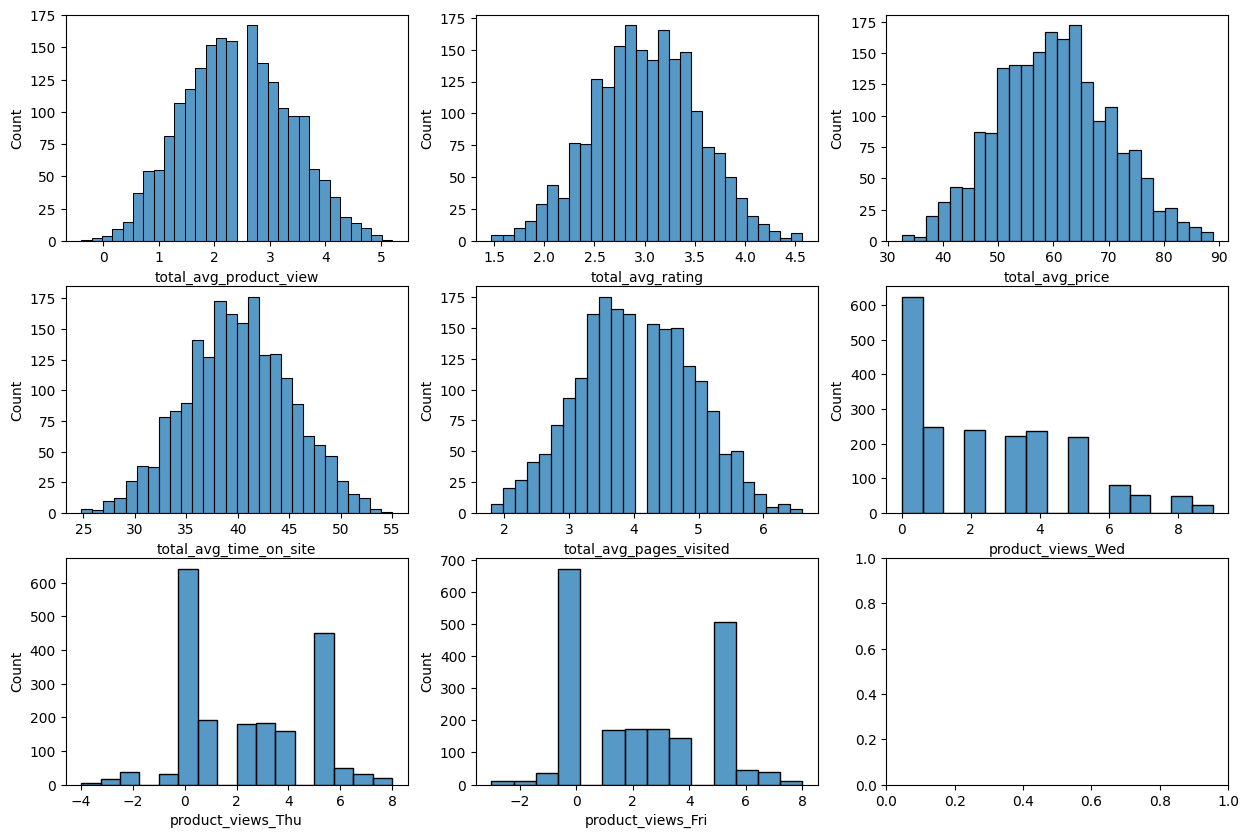

In [47]:

fig, axs = plt.subplots(3,3, figsize=(15,10))
sns.histplot(new_df['total_avg_product_view'], ax=axs[0][0])
sns.histplot(new_df['total_avg_rating'], ax=axs[0][1])
sns.histplot(new_df['total_avg_price'], ax=axs[0][2])
sns.histplot(new_df['total_avg_time_on_site'], ax=axs[1][0])
sns.histplot(new_df['total_avg_pages_visited'], ax=axs[1][1])
sns.histplot(new_df['product_views_Wed'], ax=axs[1][2])
sns.histplot(new_df['product_views_Thu'], ax=axs[2][0])
sns.histplot(new_df['product_views_Fri'], ax=axs[2][1])

<Axes: xlabel='converted_Fri', ylabel='product_views_Fri'>

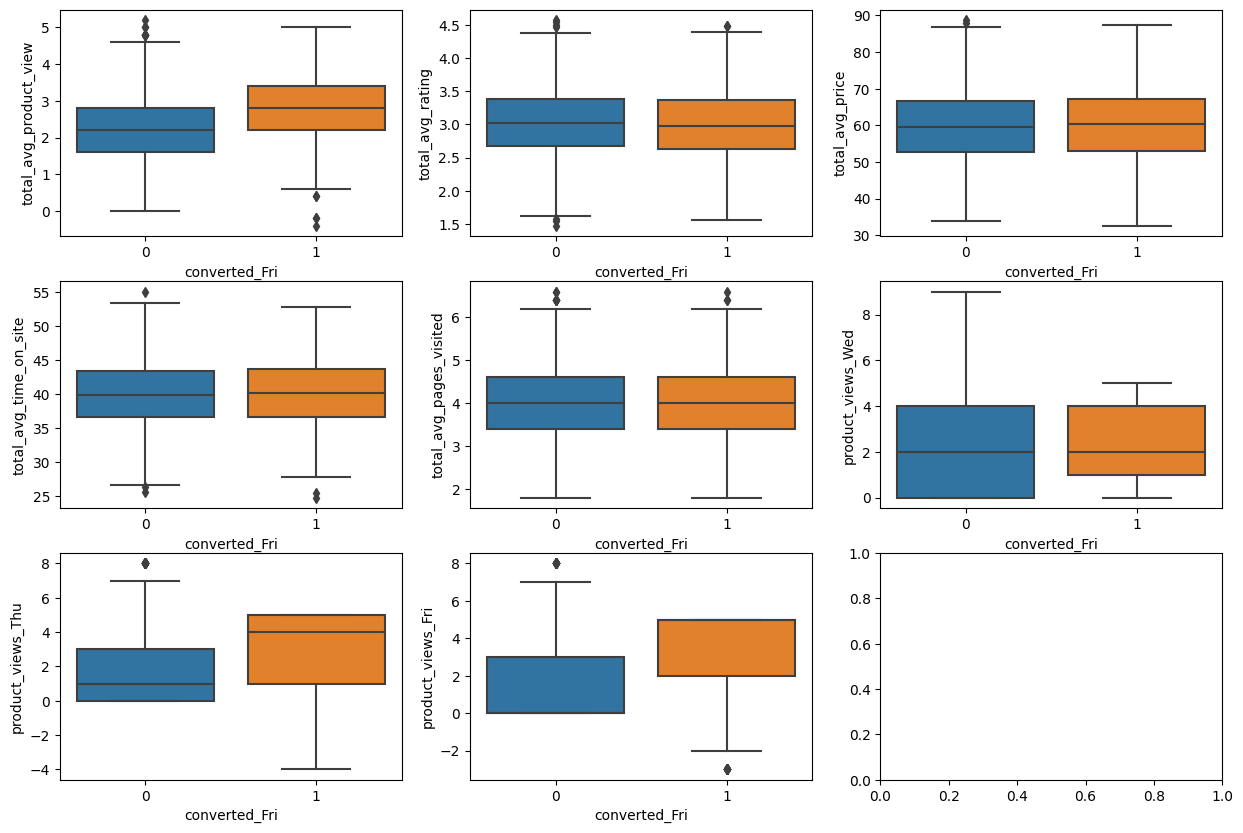

In [48]:
fig, axs = plt.subplots(3,3, figsize=(15,10))
sns.boxplot(y='total_avg_product_view', x='converted_Fri', data=new_df,ax=axs[0][0])
sns.boxplot(y='total_avg_rating', x='converted_Fri', data=new_df, ax=axs[0][1])
sns.boxplot(y='total_avg_price', x='converted_Fri', data=new_df, ax=axs[0][2])
sns.boxplot(y='total_avg_time_on_site', x='converted_Fri', data=new_df, ax=axs[1][0])
sns.boxplot(y='total_avg_pages_visited', x='converted_Fri', data=new_df, ax=axs[1][1])
sns.boxplot(y='product_views_Wed', x='converted_Fri', data=new_df, ax=axs[1][2])
sns.boxplot(y='product_views_Thu', x='converted_Fri', data=new_df, ax=axs[2][0])
sns.boxplot(y='product_views_Fri', x='converted_Fri', data=new_df, ax=axs[2][1])

### Initial Hypothesis: 
product_views_Wed, product_views_Thu, product_views_Fri, total_avg_product_view are strong predictors of converted_Fri

<Axes: xlabel='converted_Fri', ylabel='total_avg_rating'>

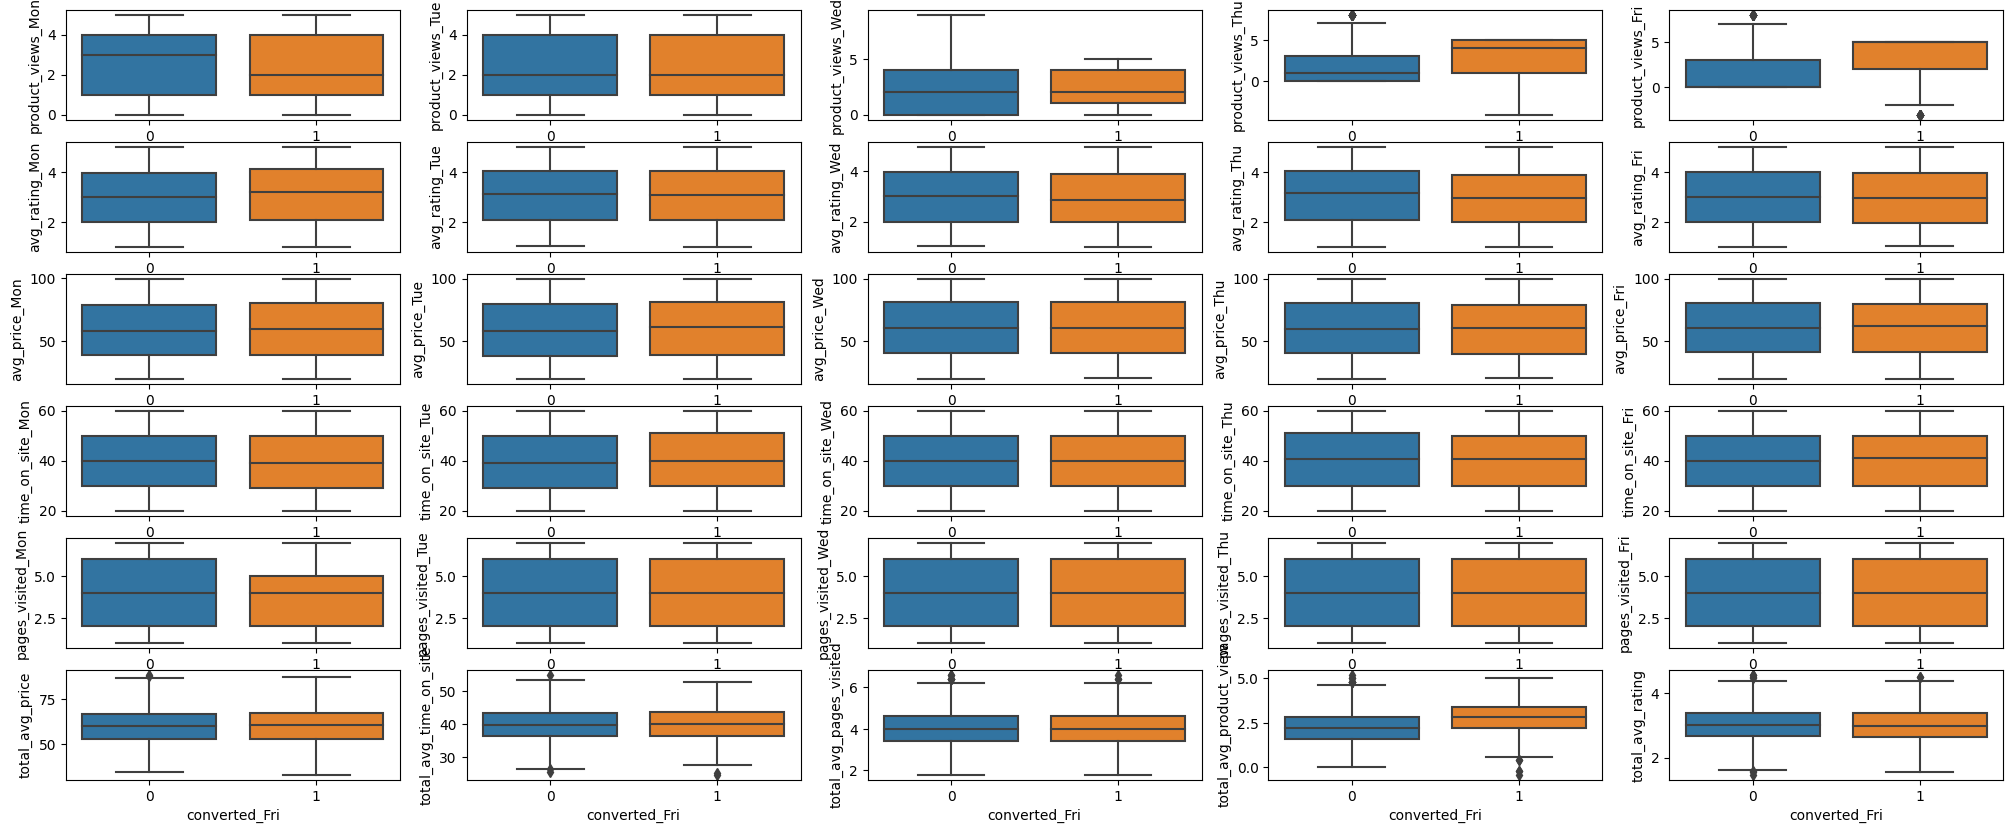

In [50]:
# Just to confirm we did not miss out on any relevant predictors, lets look at all numerical columns vs. target
fig, axs = plt.subplots(6,5, figsize=(25,10))  
sns.boxplot(y='product_views_Mon', x='converted_Fri', data=df,ax=axs[0][0])
sns.boxplot(y='product_views_Tue', x='converted_Fri', data=df,ax=axs[0][1])
sns.boxplot(y='product_views_Wed', x='converted_Fri', data=df,ax=axs[0][2])
sns.boxplot(y='product_views_Thu', x='converted_Fri', data=df,ax=axs[0][3])
sns.boxplot(y='product_views_Fri', x='converted_Fri', data=df,ax=axs[0][4])
sns.boxplot(y='avg_rating_Mon', x='converted_Fri', data=df,ax=axs[1][0])
sns.boxplot(y='avg_rating_Tue', x='converted_Fri', data=df,ax=axs[1][1])
sns.boxplot(y='avg_rating_Wed', x='converted_Fri', data=df,ax=axs[1][2])
sns.boxplot(y='avg_rating_Thu', x='converted_Fri', data=df,ax=axs[1][3])
sns.boxplot(y='avg_rating_Fri', x='converted_Fri', data=df,ax=axs[1][4])
sns.boxplot(y='avg_price_Mon', x='converted_Fri', data=df, ax=axs[2][0])
sns.boxplot(y='avg_price_Tue', x='converted_Fri', data=df,ax=axs[2][1])
sns.boxplot(y='avg_price_Wed', x='converted_Fri', data=df,ax=axs[2][2])
sns.boxplot(y='avg_price_Thu', x='converted_Fri', data=df,ax=axs[2][3])
sns.boxplot(y='avg_price_Fri', x='converted_Fri', data=df,ax=axs[2][4])
sns.boxplot(y='time_on_site_Mon', x='converted_Fri', data=df, ax=axs[3][0])
sns.boxplot(y='time_on_site_Tue', x='converted_Fri', data=df,ax=axs[3][1])
sns.boxplot(y='time_on_site_Wed', x='converted_Fri', data=df,ax=axs[3][2])
sns.boxplot(y='time_on_site_Thu', x='converted_Fri', data=df,ax=axs[3][3])
sns.boxplot(y='time_on_site_Fri', x='converted_Fri', data=df,ax=axs[3][4])
sns.boxplot(y='pages_visited_Mon', x='converted_Fri', data=df, ax=axs[4][0])
sns.boxplot(y='pages_visited_Tue', x='converted_Fri', data=df,ax=axs[4][1])
sns.boxplot(y='pages_visited_Wed', x='converted_Fri', data=df,ax=axs[4][2])
sns.boxplot(y='pages_visited_Thu', x='converted_Fri', data=df,ax=axs[4][3])
sns.boxplot(y='pages_visited_Fri', x='converted_Fri', data=df,ax=axs[4][4])
sns.boxplot(y='total_avg_price', x='converted_Fri', data=df, ax=axs[5][0])
sns.boxplot(y='total_avg_time_on_site', x='converted_Fri', data=df, ax=axs[5][1])
sns.boxplot(y='total_avg_pages_visited', x='converted_Fri', data=df, ax=axs[5][2])
sns.boxplot(y='total_avg_product_view', x='converted_Fri', data=df,ax=axs[5][3])
sns.boxplot(y='total_avg_rating', x='converted_Fri', data=df, ax=axs[5][4])


#### Our initial hypothesis stands true for now

In [51]:
categorical_cols

['visitor_location', 'marketing_channel', 'gender', 'converted_Fri']

In [52]:
new_df.groupby(['gender','converted_Fri'])['visitor_location'].count().unstack()

converted_Fri    0    1
gender                 
F              601  487
M              653  251

In [53]:
new_df.groupby(['marketing_channel','converted_Fri'])['visitor_location'].count().unstack()

converted_Fri        0    1
marketing_channel          
facebook           237  155
google             234  164
instagram          256  172
organic            311   95
youtube            216  152

In [54]:
new_df.groupby(['visitor_location','converted_Fri'])['visitor_location'].count().unstack()

converted_Fri       0    1
visitor_location          
Asia              231  137
Australia         268  134
Europe            234  147
North America     267  142
South America     254  178

In [55]:
new_df[new_df['converted_Fri']==0].describe(include='all')

visitor_location marketing_channel gender  product_views_Wed   
count              1254              1254   1254        1254.000000  \
unique                5                 5      2                NaN   
top           Australia           organic      M                NaN   
freq                268               311    653                NaN   
mean                NaN               NaN    NaN           2.433014   
std                 NaN               NaN    NaN           2.658221   
min                 NaN               NaN    NaN           0.000000   
25%                 NaN               NaN    NaN           0.000000   
50%                 NaN               NaN    NaN           2.000000   
75%                 NaN               NaN    NaN           4.000000   
max                 NaN               NaN    NaN           9.000000   

        product_views_Thu  product_views_Fri  total_avg_product_view   
count         1254.000000        1254.000000             1254.000000  \
unique                NaN                NaN                     NaN   
top                   NaN                NaN                     NaN   
freq                  NaN                NaN                     NaN   
mean             1.766348           1.646730                2.161404   
std              2.185445           2.138184                0.916903   
min              0.000000           0.000000                0.000000   
25%              0.000000           0.000000                1.600000   
50%              1.000000           0.000000                2.200000   
75%              3.000000           3.000000                2.800000   
max              8.000000           8.000000                5.200000   

        total_avg_rating  total_avg_price  total_avg_time_on_site   
count        1254.000000      1254.000000             1254.000000  \
unique               NaN              NaN                     NaN   
top                  NaN              NaN                     NaN   
freq                 NaN              NaN                     NaN   
mean            3.015059        59.902911               40.011483   
std             0.522389        10.153727                5.123789   
min             1.472000        33.832000               25.600000   
25%             2.672000        52.632500               36.600000   
50%             3.017000        59.651000               39.800000   
75%             3.379500        66.556000               43.400000   
max             4.574000        88.798000               55.000000   

        total_avg_pages_visited  converted_Fri  
count               1254.000000         1254.0  
unique                      NaN            NaN  
top                         NaN            NaN  
freq                        NaN            NaN  
mean                   4.030303            0.0  
std                    0.902160            0.0  
min                    1.800000            0.0  
25%                    3.400000            0.0  
50%                    4.000000            0.0  
75%                    4.600000            0.0  
max                    6.600000            0.0

In [56]:
new_df[new_df['converted_Fri']==1].describe(include='all')

visitor_location marketing_channel gender  product_views_Wed   
count               738               738    738         738.000000  \
unique                5                 5      2                NaN   
top       South America         instagram      F                NaN   
freq                178               172    487                NaN   
mean                NaN               NaN    NaN           2.470190   
std                 NaN               NaN    NaN           1.684732   
min                 NaN               NaN    NaN           0.000000   
25%                 NaN               NaN    NaN           1.000000   
50%                 NaN               NaN    NaN           2.000000   
75%                 NaN               NaN    NaN           4.000000   
max                 NaN               NaN    NaN           5.000000   

        product_views_Thu  product_views_Fri  total_avg_product_view   
count          738.000000         738.000000              738.000000  \
unique                NaN                NaN                     NaN   
top                   NaN                NaN                     NaN   
freq                  NaN                NaN                     NaN   
mean             3.079946           3.544715                2.823035   
std              2.439577           2.150707                0.897674   
min             -4.000000          -3.000000               -0.400000   
25%              1.000000           2.000000                2.200000   
50%              4.000000           5.000000                2.800000   
75%              5.000000           5.000000                3.400000   
max              5.000000           5.000000                5.000000   

        total_avg_rating  total_avg_price  total_avg_time_on_site   
count         738.000000       738.000000              738.000000  \
unique               NaN              NaN                     NaN   
top                  NaN              NaN                     NaN   
freq                 NaN              NaN                     NaN   
mean            3.001748        60.340309               40.085366   
std             0.525427        10.222316                5.030019   
min             1.564000        32.574000               24.800000   
25%             2.630500        52.858000               36.600000   
50%             2.978000        60.361000               40.200000   
75%             3.368000        67.228000               43.600000   
max             4.484000        87.478000               52.800000   

        total_avg_pages_visited  converted_Fri  
count                738.000000          738.0  
unique                      NaN            NaN  
top                         NaN            NaN  
freq                        NaN            NaN  
mean                   4.000000            1.0  
std                    0.880607            0.0  
min                    1.800000            1.0  
25%                    3.400000            1.0  
50%                    4.000000            1.0  
75%                    4.600000            1.0  
max                    6.600000            1.0

### Some more Preliminary insights: 
- For people who converted, a big chunk of them is from South America, came from Instagram and are mostly Females
- For people who did not convert, a big chunk of them is from Australia, came organically and are mostly males.

In [57]:
new_df

visitor_location marketing_channel gender  product_views_Wed   
0       North America           youtube      M                  2  \
1       South America           organic      F                  0   
2           Australia         instagram      M                  0   
3       North America          facebook      M                  0   
4                Asia         instagram      F                  2   
...               ...               ...    ...                ...   
1995           Europe           organic      F                  0   
1996    South America            google      M                  0   
1997             Asia          facebook      M                  0   
1998    South America           youtube      F                  2   
1999    North America         instagram      F                  1   

      product_views_Thu  product_views_Fri  total_avg_product_view   
0                     1                  2                     2.8  \
1                     1                  5                     2.6   
2                    -3                  5                     1.8   
3                     5                  0                     1.2   
4                     2                  3                     2.6   
...                 ...                ...                     ...   
1995                  4                  2                     1.8   
1996                  4                  1                     1.6   
1997                  0                  8                     2.6   
1998                  5                  5                     3.2   
1999                  5                  1                     2.0   

      total_avg_rating  total_avg_price  total_avg_time_on_site   
0                3.134           54.738                    43.2  \
1                2.068           71.432                    33.2   
2                3.666           64.358                    28.8   
3                3.300           56.048                    37.2   
4                2.364           46.442                    44.6   
...                ...              ...                     ...   
1995             3.008           57.260                    35.6   
1996             1.858           45.702                    45.6   
1997             3.280           52.544                    34.8   
1998             3.662           51.752                    37.8   
1999             2.924           59.608                    34.2   

      total_avg_pages_visited  converted_Fri  
0                         4.8              1  
1                         5.2              0  
2                         2.4              1  
3                         4.4              0  
4                         4.6              1  
...                       ...            ...  
1995                      5.0              0  
1996                      5.2              0  
1997                      4.0              0  
1998                      3.4              1  
1999                      4.0              1  

[1992 rows x 12 columns]

In [58]:
numerical_cols.append('product_views_Wed')

In [59]:
numerical_cols.append('product_views_Thu')
numerical_cols.append('product_views_Fri')

# Part 3: Model Development

In [60]:
numerical_cols

['total_avg_product_view',
 'total_avg_rating',
 'total_avg_price',
 'total_avg_time_on_site',
 'total_avg_pages_visited',
 'product_views_Wed',
 'product_views_Thu',
 'product_views_Fri']

In [61]:
cat_cols = ['visitor_location', 'marketing_channel', 'gender']

In [62]:
target = 'converted_Fri'

In [63]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_cols),
                                                 ('num', num_transformer, numerical_cols)])


In [64]:
X_train, X_test, y_train, y_test = train_test_split(new_df[cat_cols + numerical_cols], new_df[target], test_size=0.2, random_state=123)


In [65]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [66]:
x_train_transformed.shape

(1593, 20)

In [67]:
x_test_transformed.shape

(399, 20)

In [68]:
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
encoded_columns = encoded_columns.tolist()
all_feat = numerical_cols + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [69]:
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier()

In [70]:
log.fit(X_train_transformed, y_train)
nb.fit(X_train_transformed, y_train)
knn.fit(X_train_transformed, y_train)
svc.fit(X_train_transformed, y_train)
dt.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [71]:
pred_l = log.predict(X_test_transformed)
pred_nb = nb.predict(X_test_transformed)
pred_knn = knn.predict(X_test_transformed)
pred_svc = svc.predict(X_test_transformed)
pred_dt = dt.predict(X_test_transformed)

In [72]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))
print(f1_score(pred_dt, y_test))

0.6324110671936759
0.6370370370370371
0.6470588235294118
0.674698795180723
0.829090909090909


In [73]:
print(recall_score(pred_l, y_test))
print(recall_score(pred_nb, y_test))
print(recall_score(pred_knn, y_test))
print(recall_score(pred_svc, y_test))
print(recall_score(pred_dt, y_test))

0.6722689075630253
0.6323529411764706
0.6376811594202898
0.7304347826086957
0.8085106382978723


In [74]:
print(precision_score(pred_l, y_test))
print(precision_score(pred_nb, y_test))
print(precision_score(pred_knn, y_test))
print(precision_score(pred_svc, y_test))
print(precision_score(pred_dt, y_test))

0.5970149253731343
0.6417910447761194
0.6567164179104478
0.6268656716417911
0.8507462686567164


#### Since we can accept some False positives in this situation, lets pick Recall as our metric. 
# Part 4: Hyperparameter Tuning and Cross Validation

In [75]:
# Logistic
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [50, 100, 200]
}
rs_log = RandomizedSearchCV(log, param_distributions=param_grid, cv=10)
rs_log.fit(x_train_transformed,y_train)
rs_log.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [76]:
log_best = LogisticRegression(C=1000,max_iter=50,penalty='l1',solver='liblinear')

log_best.fit(x_train_transformed,y_train)
pred_best_log = log_best.predict(x_test_transformed)
cv_scores = cross_val_score(log_best, x_train_transformed, y_train, cv=10, scoring='f1')
print("Cross-validation scores for Logistic Regression: ", cv_scores)

Cross-validation scores for Logistic Regression:  [0.61682243 0.61538462 0.68468468 0.66666667 0.62135922 0.66666667
 0.68376068 0.59259259 0.62385321 0.66055046]


In [77]:
cv_scores.mean()

0.6432341232688193

In [78]:
print(recall_score(pred_best_log, y_test))

0.6722689075630253


In [79]:
# SVC
svc_params = {'kernel':['linear','poly','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=5, scoring='recall')
rs_svc.fit(X_train_transformed, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=3,
                   param_distributions={'kernel': ['linear', 'poly', 'rbf']},
                   scoring='recall')

In [80]:
rs_svc.best_estimator_

SVC()

In [81]:
svc_best = SVC()
svc_best.fit(X_train_transformed,y_train)
pred_svc_best = svc_best.predict(X_test_transformed)
print(recall_score(pred_svc_best, y_test))

0.7304347826086957


In [82]:
cv_scores = cross_val_score(svc_best, x_train_transformed, y_train, cv=10, scoring='f1')
print("Cross-validation scores for SVC: ", cv_scores)

Cross-validation scores for SVC:  [0.64150943 0.74576271 0.73394495 0.7704918  0.69306931 0.76033058
 0.72566372 0.69090909 0.64285714 0.7079646 ]


In [83]:
cv_scores.mean()

0.7112503341027194

In [84]:
#DT
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train_transformed, y_train)

In [85]:
new_df

visitor_location marketing_channel gender  product_views_Wed   
0       North America           youtube      M                  2  \
1       South America           organic      F                  0   
2           Australia         instagram      M                  0   
3       North America          facebook      M                  0   
4                Asia         instagram      F                  2   
...               ...               ...    ...                ...   
1995           Europe           organic      F                  0   
1996    South America            google      M                  0   
1997             Asia          facebook      M                  0   
1998    South America           youtube      F                  2   
1999    North America         instagram      F                  1   

      product_views_Thu  product_views_Fri  total_avg_product_view   
0                     1                  2                     2.8  \
1                     1                  5                     2.6   
2                    -3                  5                     1.8   
3                     5                  0                     1.2   
4                     2                  3                     2.6   
...                 ...                ...                     ...   
1995                  4                  2                     1.8   
1996                  4                  1                     1.6   
1997                  0                  8                     2.6   
1998                  5                  5                     3.2   
1999                  5                  1                     2.0   

      total_avg_rating  total_avg_price  total_avg_time_on_site   
0                3.134           54.738                    43.2  \
1                2.068           71.432                    33.2   
2                3.666           64.358                    28.8   
3                3.300           56.048                    37.2   
4                2.364           46.442                    44.6   
...                ...              ...                     ...   
1995             3.008           57.260                    35.6   
1996             1.858           45.702                    45.6   
1997             3.280           52.544                    34.8   
1998             3.662           51.752                    37.8   
1999             2.924           59.608                    34.2   

      total_avg_pages_visited  converted_Fri  
0                         4.8              1  
1                         5.2              0  
2                         2.4              1  
3                         4.4              0  
4                         4.6              1  
...                       ...            ...  
1995                      5.0              0  
1996                      5.2              0  
1997                      4.0              0  
1998                      3.4              1  
1999                      4.0              1  

[1992 rows x 12 columns]

In [86]:

X_encoded = pd.get_dummies(new_df.iloc[:,:11], columns=cat_cols, dtype=int)

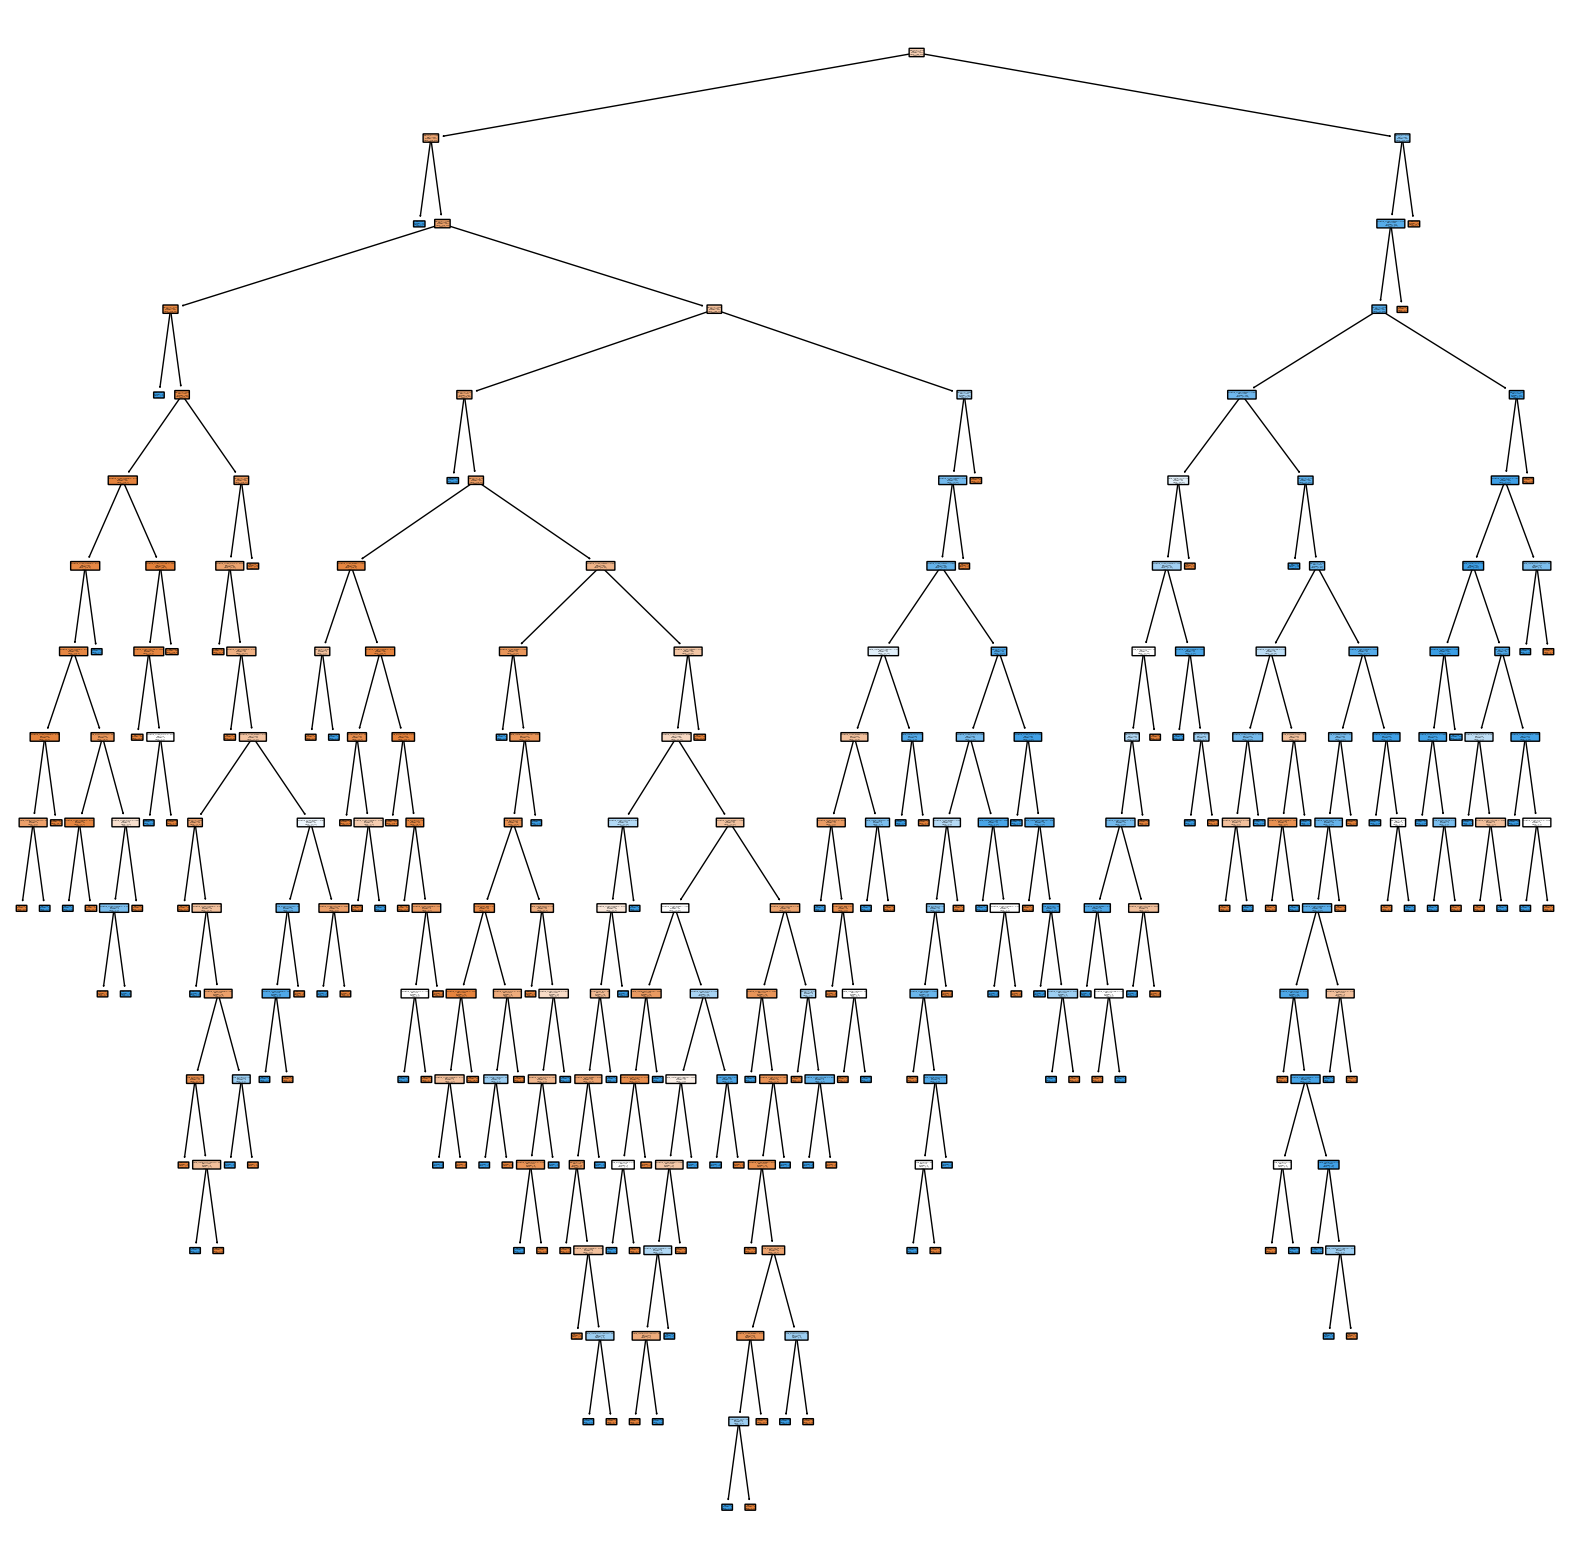

In [87]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [88]:
pred_dt = dt.predict(X_test_transformed)


In [89]:
pred_dt

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [90]:
print(recall_score(pred_dt, y_test))

0.8129496402877698


In [91]:
cv_scores = cross_val_score(dt, X_train_transformed, y_train, cv=10, scoring='f1')
print("Cross-validation scores for SVC: ", cv_scores)

Cross-validation scores for SVC:  [0.75862069 0.82258065 0.82352941 0.88       0.84033613 0.79032258
 0.80991736 0.84210526 0.79365079 0.79661017]


In [92]:
cv_scores.mean()

0.8157673043352226

# Part 5: Model Selection
Since Decision Tree is performing the best in terms of recall score and CV_scores as well, we will choose Decision Tree. 

In [93]:
dt = DecisionTreeClassifier()

In [94]:
dt_params = {'criterion':['gini','entropy','log_loss'],
             'splitter': ['best','random'],
             'max_depth':range(5,20),
             'min_samples_split':range(5,20),
             'min_samples_leaf':range(5,20),
             }

rs_dt = RandomizedSearchCV(dt, dt_params, n_iter=3, cv=5, scoring='recall')
rs_dt.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=3,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(5, 20),
                                        'min_samples_leaf': range(5, 20),
                                        'min_samples_split': range(5, 20),
                                        'splitter': ['best', 'random']},
                   scoring='recall')

In [95]:
rs_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 13,
 'min_samples_leaf': 16,
 'max_depth': 18,
 'criterion': 'gini'}

In [96]:
dt_best = DecisionTreeClassifier(**rs_dt.best_params_)
dt_best.fit(X_train_transformed,y_train)
pred_dt_best = dt_best.predict(X_test_transformed)
print(recall_score(pred_dt_best, y_test))

0.8129496402877698


In [97]:
X_encoded

product_views_Wed  product_views_Thu  product_views_Fri   
0                     2                  1                  2  \
1                     0                  1                  5   
2                     0                 -3                  5   
3                     0                  5                  0   
4                     2                  2                  3   
...                 ...                ...                ...   
1995                  0                  4                  2   
1996                  0                  4                  1   
1997                  0                  0                  8   
1998                  2                  5                  5   
1999                  1                  5                  1   

      total_avg_product_view  total_avg_rating  total_avg_price   
0                        2.8             3.134           54.738  \
1                        2.6             2.068           71.432   
2                        1.8             3.666           64.358   
3                        1.2             3.300           56.048   
4                        2.6             2.364           46.442   
...                      ...               ...              ...   
1995                     1.8             3.008           57.260   
1996                     1.6             1.858           45.702   
1997                     2.6             3.280           52.544   
1998                     3.2             3.662           51.752   
1999                     2.0             2.924           59.608   

      total_avg_time_on_site  total_avg_pages_visited  visitor_location_Asia   
0                       43.2                      4.8                      0  \
1                       33.2                      5.2                      0   
2                       28.8                      2.4                      0   
3                       37.2                      4.4                      0   
4                       44.6                      4.6                      1   
...                      ...                      ...                    ...   
1995                    35.6                      5.0                      0   
1996                    45.6                      5.2                      0   
1997                    34.8                      4.0                      1   
1998                    37.8                      3.4                      0   
1999                    34.2                      4.0                      0   

      visitor_location_Australia  visitor_location_Europe   
0                              0                        0  \
1                              0                        0   
2                              1                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
1995                           0                        1   
1996                           0                        0   
1997                           0                        0   
1998                           0                        0   
1999                           0                        0   

      visitor_location_North America  visitor_location_South America   
0                                  1                               0  \
1                                  0                               1   
2                                  0                               0   
3                                  1                               0   
4                                  0                               0   
...                              ...                             ...   
1995                               0                               0   
1996                               0                               1   
1997                               0                               0   
1998  

In [98]:
X_train

visitor_location marketing_channel gender  total_avg_product_view   
1411             Asia         instagram      M                     1.8  \
803         Australia         instagram      M                     1.8   
655     North America           organic      F                     1.4   
258         Australia          facebook      F                     4.4   
953     South America          facebook      F                     2.2   
...               ...               ...    ...                     ...   
1127    North America            google      M                     1.2   
1352             Asia         instagram      M                     2.8   
1412        Australia          facebook      M                     2.4   
1395    North America         instagram      F                     2.4   
1540           Europe          facebook      F                     0.8   

      total_avg_rating  total_avg_price  total_avg_time_on_site   
1411             2.414           69.228                    48.4  \
803              1.540           61.042                    38.2   
655              3.044           76.020                    41.2   
258              2.524           43.974                    36.0   
953              3.186           64.334                    39.4   
...                ...              ...                     ...   
1127             3.222           40.010                    35.2   
1352             3.478           63.384                    42.0   
1412             3.198           59.014                    33.4   
1395             3.156           55.022                    41.8   
1540             2.710           53.448                    39.8   

      total_avg_pages_visited  product_views_Wed  product_views_Thu   
1411                      2.4                  1                  0  \
803                       4.2                  0                  5   
655                       3.2                  3                 -1   
258                       4.6                  5                  5   
953                       4.6                  2                  0   
...                       ...                ...                ...   
1127                      3.0                  0                  0   
1352                      4.6                  0                  0   
1412                      2.8                  1                  5   
1395                      5.0                  2                  0   
1540                      3.8                  0                 -1   

      product_views_Fri  
1411                  0  
803                   2  
655                   2  
258                   3  
953                   2  
...                 ...  
1127                  0  
1352                  4  
1412                  5  
1395                  5  
1540                  5  

[1593 rows x 11 columns]

# Part 6: Model Evaluation and Feature Importance

In [99]:
pred_dt_prob = dt_best.predict_proba(X_test_transformed)

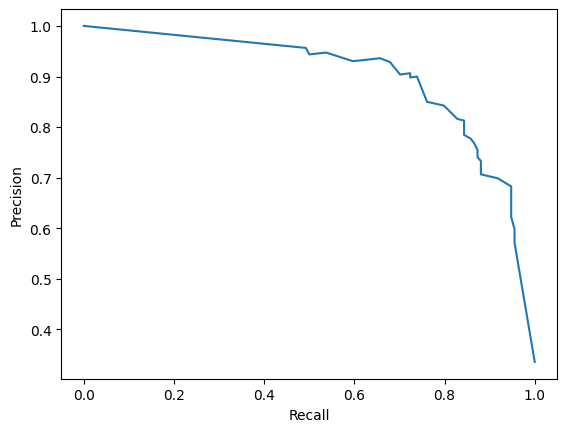

In [100]:
precision, recall, _ = precision_recall_curve(y_test, pred_dt_prob[:,1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [101]:
input_f = X_train.columns
feature_names = preprocessor.get_feature_names_out(input_f)

In [102]:
feature_names

array(['cat__visitor_location_Asia', 'cat__visitor_location_Australia',
       'cat__visitor_location_Europe',
       'cat__visitor_location_North America',
       'cat__visitor_location_South America',
       'cat__marketing_channel_facebook', 'cat__marketing_channel_google',
       'cat__marketing_channel_instagram',
       'cat__marketing_channel_organic', 'cat__marketing_channel_youtube',
       'cat__gender_F', 'cat__gender_M', 'num__total_avg_product_view',
       'num__total_avg_rating', 'num__total_avg_price',
       'num__total_avg_time_on_site', 'num__total_avg_pages_visited',
       'num__product_views_Wed', 'num__product_views_Thu',
       'num__product_views_Fri'], dtype=object)

In [103]:
feature_importances = dt_best.feature_importances_

for name, importance in zip(feature_names, feature_importances):
    print(f'Feature: {name}, Importance: {importance}')

Feature: cat__visitor_location_Asia, Importance: 0.0
Feature: cat__visitor_location_Australia, Importance: 0.0
Feature: cat__visitor_location_Europe, Importance: 0.0
Feature: cat__visitor_location_North America, Importance: 0.0
Feature: cat__visitor_location_South America, Importance: 0.002925583871094485
Feature: cat__marketing_channel_facebook, Importance: 0.0
Feature: cat__marketing_channel_google, Importance: 0.0
Feature: cat__marketing_channel_instagram, Importance: 0.0
Feature: cat__marketing_channel_organic, Importance: 0.0
Feature: cat__marketing_channel_youtube, Importance: 0.0
Feature: cat__gender_F, Importance: 0.0038245676233865504
Feature: cat__gender_M, Importance: 0.0010567463585087723
Feature: num__total_avg_product_view, Importance: 0.0099440861461939
Feature: num__total_avg_rating, Importance: 0.016219403597376614
Feature: num__total_avg_price, Importance: 0.01140947234568859
Feature: num__total_avg_time_on_site, Importance: 0.001801408938955588
Feature: num__total_av

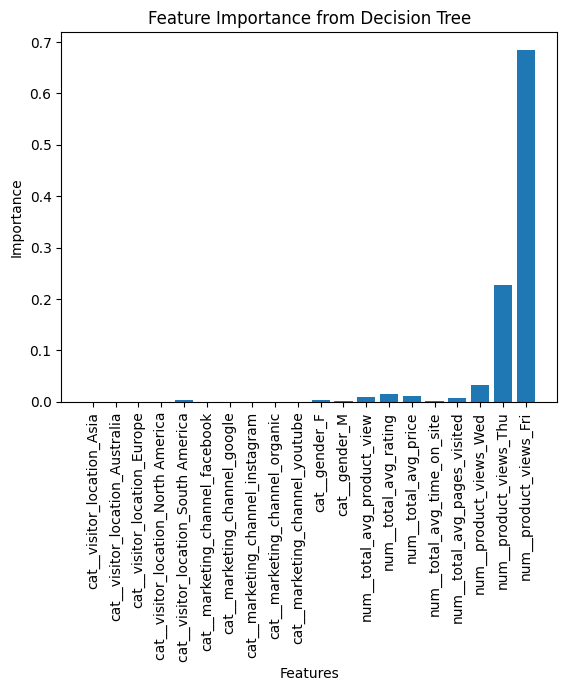

In [104]:
plt.bar(feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.xticks(rotation=90) 
plt.show()

## Analysis

### what are the characteristics of users who convert (behavioural and demographic)?

We gathered some insights from our [statistical analysis](#statistical-analysis) that we will explain further.
On further exploring the data by groups, we came to a [preliminary analysis](#some-more-preliminary-insights):


### 1. Conduct exploratory analysis on the provided dataset. State your hypothesis based on the insights from your exploration.

[Exploratory analysis can be found here](#eda)

Our [Initial Hypothesis](#initial-hypothesis) based on numerical data showed:
product_views_Wed, product_views_Thu, product_views_Fri, total_avg_product_view are strong predictors of converted_Fri

Additionally, Categorical columns like Gender, Location and Marketing channel all seem relevant to the conversion. 

### Model evaluation

Checked recall, precision and f1 score for all models first. On further analysing the business problem, I chose to focus on recall. This is because Recall helps ensure that we are correctly identifying as many converted customers as possible, even if that means accepting some false positives (when a customer is expected to convert but they did not convert). 

I could see the highest recall for Decision Tree, second highest for SVC and third highest for Logistic Regression so I chose all three to optimize and explore them further. 

### Final model selection and optimization

We performed hyperparameter tuning and cross validation on all 3 models [here](#part-4-hyperparameter-tuning-and-cross-validation)

After hyperparameter tuning and Mean CV score, we saw that Decision Tree was still the best model in terms of Recall and we decided to finalize this as our model. 

## Breakdown of Approach

From the initial data exploration, we saw that there was no missing data. On further looking at the columns, we saw that there were 5 metrics for each of the 5 working days of the week creating 25 columns. To reduce some dimensionality, we combined all days mean to form 5 metrics. 

Next we decided to check for outliers using a boxplot in the numerical columns. We checked for skewness and kurtosis and tested whether it would be valid to drop the outliers based on Z-score on skewness. The test dropped 8 values so we proceeded to apply that to our main data frame. 

We moved on to some statistical analysis and saw that 
- There is a statistically significant difference in total_avg_pages_visited for locations (and somewhat in total_avg_product_view)
- There is no statistically significant difference in all 5 metrics based on marketing channel
- There is a very statistically significant difference in total_avg_product_view for different genders.

We decided to explore the numerical columns by looking at their distributions on the historgram and notice product_views on Wed, Thu and Fri were showing variablity meaning they are strong predictors of the target. We decided to explore the data further by looking at some more plots such as boxplots of numerical columns againts the target variable showed us total_avg_product_view was also a strong predictor of the target. To ensure we did not miss out on any other strong predictors, we reviewed boxplots of each column in the original dataframe and found our initial hypothesis to be true still. 

Next we decided to review categorical columns and their counts for the target variable and saw that:
- For people who converted, a big chunk of them are from South America, came from Instagram and are mostly Females
- For people who did not convert, a big chunk of them are from Australia, came organically and are mostly males.

Next, we moved on to model development and decided to explore 5 models based on their recall score as we decided to accept some false positives. Based on this score and hyperparameter tuning, we saw that Decision tree was the best model and finalized it with a recall of 0.85. 

In the [feature importance](#part-6-model-evaluation-and-feature-importance) section, we saw that our initial hypothesis was true. This means that as the number of products viewed on Wednesday, Thursday and Friday increases, so does the likelihood of this customer to convert increase. We also saw some importance on Gender as most females were more likely to convert. 

This model can be used by the business as follows:

- Ensure people view more products on Wednesday, thursday and friday based on targeted ads on instagram, facebook, etc.
- Ensure more females are exposed to the products as they are more likely to convert. 
- Look at other feature importances to decide what can be done. 

## Business Insights and Impact

### Key Insights
- **Peak Conversion Days:** The significant impact of product views on Wednesday, Thursday, and Friday highlights the potential for targeted promotional activities on these days to maximize conversion rates.
- **Demographic Targeting:** The higher conversion rates among females suggest that marketing strategies should be tailored to appeal more to this demographic.
- **Geographical Differences:** The varying conversion rates by location indicate the potential for region-specific marketing strategies, maximizing relevance and engagement.

### Strategic Business Recommendations
- **Enhanced Targeting Strategies:** Implement dynamic advertising schedules focusing on peak days (Wednesday to Friday) to capture user engagement effectively. Utilize demographic data to tailor the content and timing of ads, especially targeting females who have shown a higher likelihood to convert.
- **Localized Marketing Initiatives:** Develop localized campaigns that cater to the preferences and behaviors of users in high-conversion areas, particularly in South America. This could involve localized content, special offers, and partnerships with local influencers.
- **Optimize Marketing Channels:** Given the significant role of social media channels like Instagram in driving conversions, allocate more budget towards these platforms. Analyze performance data to identify the most effective channels and adjust strategies accordingly.
- **User Experience Improvements:** Enhance the online browsing experience to encourage higher product views, especially on peak days. This could include optimizing the website interface, improving load times, and personalizing product recommendations.
- **Continuous Learning and Adaptation:** Regularly review and update the models and strategies based on ongoing data analysis to adapt to changing consumer behaviors and market conditions.

### Impact Assessment
- **Increased Conversion Rate:** By implementing targeted strategies based on days of the week and user demographics, expect an increase in overall conversion rates, leading to higher revenue.
- **Improved Customer Engagement:** Tailored and localized marketing efforts will likely enhance user engagement, increasing brand loyalty and customer lifetime value.
- **Cost Efficiency:** Focusing on high-impact marketing channels and times will optimize advertising spend, reducing waste and improving the return on investment.

### Future Work
- **Longitudinal Study:** Conduct a longitudinal study to track the effectiveness of implemented strategies over time, adjusting as necessary based on observed results and new data insights.
- **Expand Model Capabilities:** Continue to refine and expand the predictive model to include more variables, such as user feedback and interaction rates, to further enhance predictive accuracy and business outcomes.